<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Libraries </p>
     </b>
</h1>

In [1]:
%%capture no_output
if 'plottable' not in dir():
    !pip install plottable
    !pip install datasist

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor

from plottable import Table, ColumnDefinition as ColDef
from matplotlib.patches import Rectangle
from lightgbm import LGBMRegressor
import time
from sklearn.model_selection import GridSearchCV
from  datasist.structdata import detect_outliers
from prettytable import PrettyTable
import optuna

from math import sqrt

optuna.logging.set_verbosity(optuna.logging.WARNING) 

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Loading Data </p>
     </b>
</h1>

In [3]:
df = pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv', encoding = 'latin-1' )

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Understand the Data </p>
     </b>
</h1>

In [4]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c"> Data Cleaning</p>
     </b>
</h1>

In [5]:
df.drop('laptop_ID', axis=1,inplace =True)
df.drop('Product', axis=1,inplace =True)

In [6]:
df.duplicated().sum()

29

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [8]:
df.shape

(1274, 11)

In [9]:
df.describe()

,Inches,Price_euros
count,1274.000000,1274.000000
mean,15.022449,1135.570290
std,1.429940,700.698629
min,10.100000,174.000000
25%,14.000000,609.902500
50%,15.600000,989.000000
75%,15.600000,1497.250000
max,18.400000,6099.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price_euros       1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


<h2>
    <b>
        <span style="color:#E67E22">
            Wrangling Data
        </span>
    </b>
</h2>

In [11]:
df2=(df.assign(
           company=df.Company.astype('category'),    
           type_name=df.TypeName.astype('category'),
           touch_screen=df.ScreenResolution.apply(lambda x:1 if 'touchscreen' in str(x).lower() else 0).astype('int8'),
           screen_resolution=df.ScreenResolution.apply(lambda x:x.split(' ').pop() if 'x' in str(x).lower() else x).astype('category'),
           cpu_name = df.Cpu.apply(lambda x: x.split(' ')[0] if len(x.split(' ')) >= 1 else x).astype('category'),
           cpu_speed=df.Cpu.apply(lambda x:x.split(' ').pop().strip("GHz") if 'hz' in str(x).lower() else x).astype('float'),
           ram=df.Ram.apply(lambda x: x.strip('GB') if 'gb' in str(x).lower() else x).astype('int16'),
           memory_size=df.Memory.apply(lambda x: x.split()[0].strip('GB') if 'b' in str(x).lower() else x)\
           .apply(lambda x: '1024'  if x in ['1T','1.0T'] else x)\
           .apply(lambda x: '2048'  if x=='2T' else x).astype('int16'),
           memory_type=df.Memory.apply(lambda x:x.split(' ')[1] if x.split(' ')[1] in ['SSD','HDD']  else 'flash_storage').astype('category'),
           extra_memory=df.Memory.apply(lambda x:x.split().pop(3) if '+' in str(x)  else 0).apply(lambda x:'1TB' if x in ['1.0TB','+']  else x).apply(lambda x: x.split()[0].strip('GB') if 'b' in str(x).lower() else x)\
           .apply(lambda x: '1024'  if x in ['1T','1.0T'] else x)\
           .apply(lambda x: '2048'  if x=='2T' else x).astype('int16'),
           gpu_brand=df.Gpu.apply(lambda x: (x.split().pop(0))).astype('category'),
           retina=df.ScreenResolution.apply(lambda x: 1 if 'retina' in str(x).lower() else 0).astype('int8'),
           quadscr=df.ScreenResolution.apply(lambda x: 1 if 'Quad HD+' in str(x) else 0).astype('int8'),
           operate_sys=df.OpSys.apply(lambda x:'Windows' if 'Windows' in x else 'Mac' if 'mac' in x.lower() else x).astype('category'),
           weight=df.Weight.apply(lambda x: x.strip('kg') if 'kg' in str(x).lower() else x).astype('float'),
           price=df.Price_euros.copy().astype('float'),
           inches=df.Inches.copy().astype('float')
           )
    )

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Company            1274 non-null   object  
 1   TypeName           1274 non-null   object  
 2   Inches             1274 non-null   float64 
 3   ScreenResolution   1274 non-null   object  
 4   Cpu                1274 non-null   object  
 5   Ram                1274 non-null   object  
 6   Memory             1274 non-null   object  
 7   Gpu                1274 non-null   object  
 8   OpSys              1274 non-null   object  
 9   Weight             1274 non-null   object  
 10  Price_euros        1274 non-null   float64 
 11  company            1274 non-null   category
 12  type_name          1274 non-null   category
 13  touch_screen       1274 non-null   int8    
 14  screen_resolution  1274 non-null   category
 15  cpu_name           1274 non-null   category
 16  cpu_speed  

In [13]:
df2 = df2.drop(columns=['Inches','Company','TypeName','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys','Weight','Price_euros'])

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1274 non-null   category
 1   type_name          1274 non-null   category
 2   touch_screen       1274 non-null   int8    
 3   screen_resolution  1274 non-null   category
 4   cpu_name           1274 non-null   category
 5   cpu_speed          1274 non-null   float64 
 6   ram                1274 non-null   int16   
 7   memory_size        1274 non-null   int16   
 8   memory_type        1274 non-null   category
 9   extra_memory       1274 non-null   int16   
 10  gpu_brand          1274 non-null   category
 11  retina             1274 non-null   int8    
 12  quadscr            1274 non-null   int8    
 13  operate_sys        1274 non-null   category
 14  weight             1274 non-null   float64 
 15  price              1274 non-null   float64 
 16  inches     

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Exploratory Data Visualization </p>
     </b>
</h1>

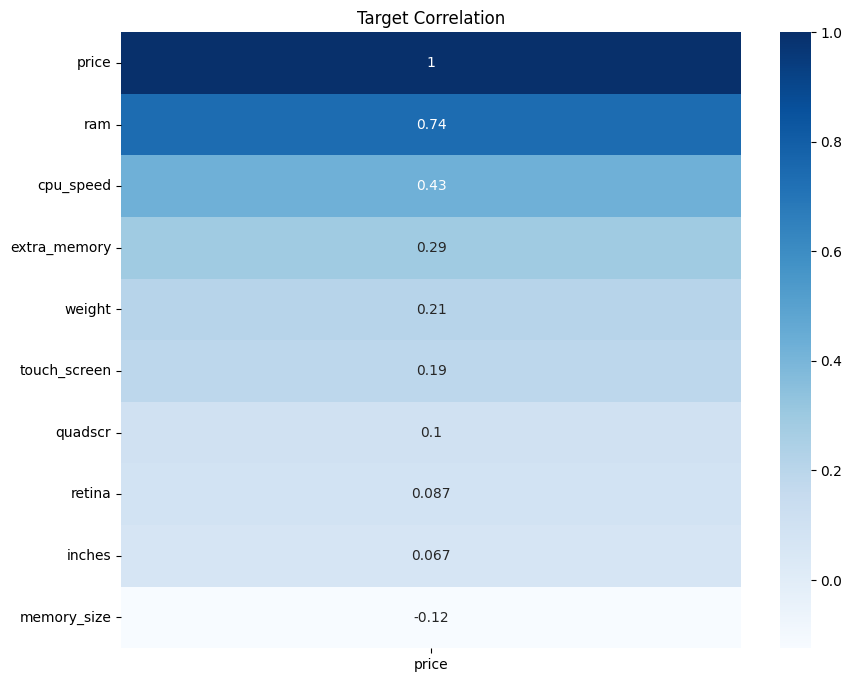

<Axes: >

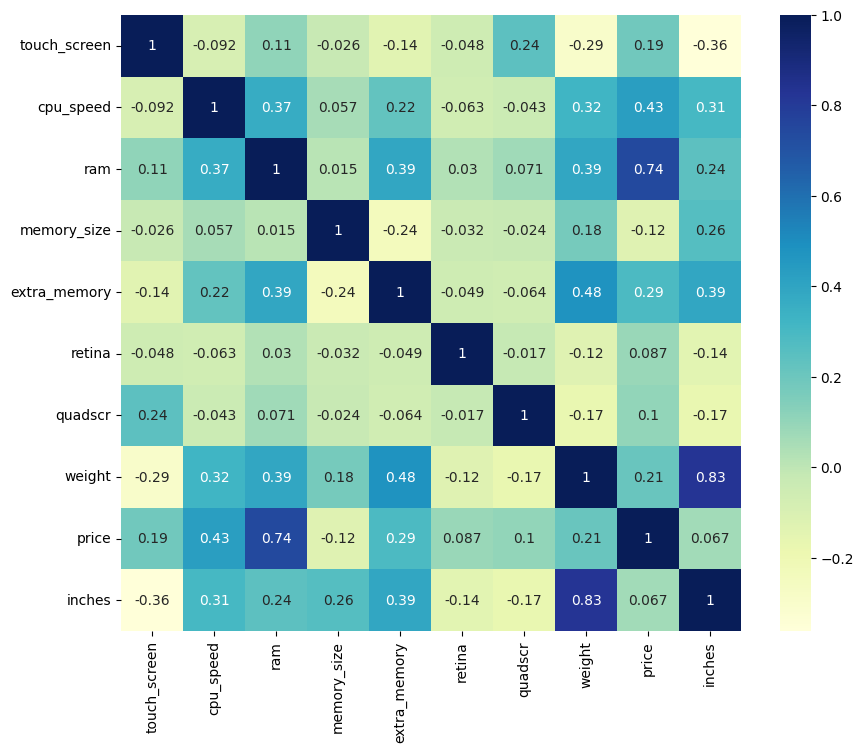

In [15]:
plt.figure(figsize = (10,8))
sns.heatmap(df2.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), annot = True, cmap = 'Blues')
plt.title('Target Correlation')
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(numeric_only=True), annot = True, cmap = "YlGnBu")

<h2>
    <b>
        <span style="color:#E67E22">
            Numerical Data
        </span>
    </b>
</h2>

In [16]:
df_num = df2[['price','cpu_speed','ram','memory_size','weight','inches','extra_memory','touch_screen','retina','quadscr']]
df_num

,price,cpu_speed,ram,memory_size,weight,inches,extra_memory,touch_screen,retina,quadscr
0,1339.69,2.3,8,128,1.37,13.3,0,0,1,0
1,898.94,1.8,8,128,1.34,13.3,0,0,0,0
2,575.00,2.5,8,256,1.86,15.6,0,0,0,0
3,2537.45,2.7,16,512,1.83,15.4,0,0,1,0
4,1803.60,3.1,8,256,1.37,13.3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1269,720.32,2.5,4,500,2.20,15.6,0,0,0,0
1270,638.00,2.5,4,128,1.80,14.0,0,1,0,0
1271,1499.00,2.5,16,512,1.30,13.3,0,1,0,1
1272,229.00,1.6,2,64,1.50,14.0,0,0,0,0


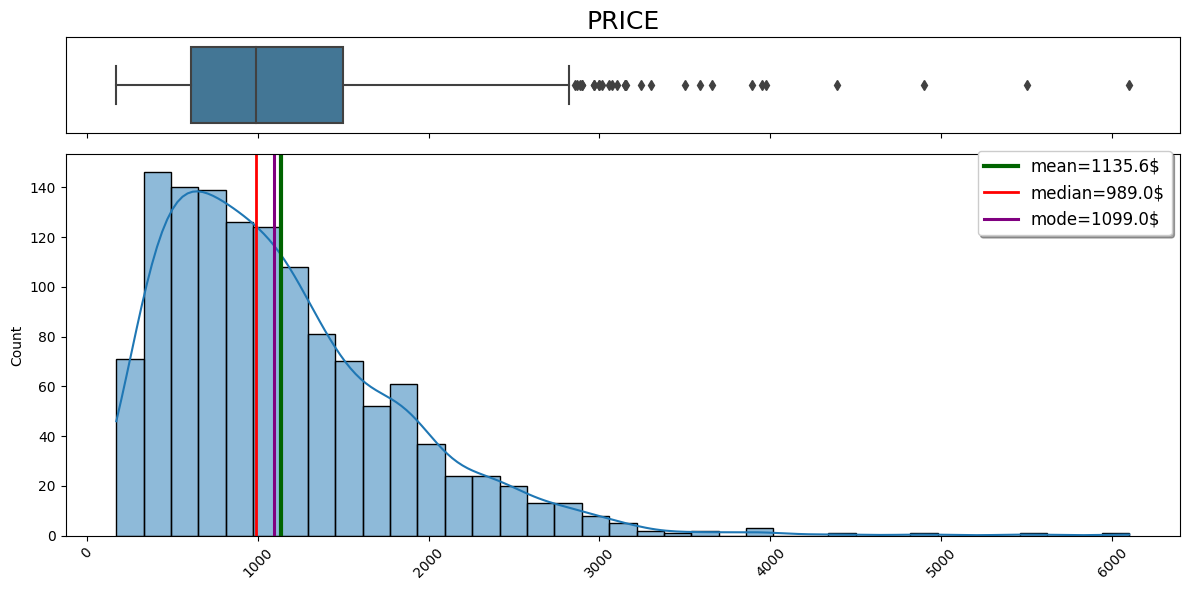

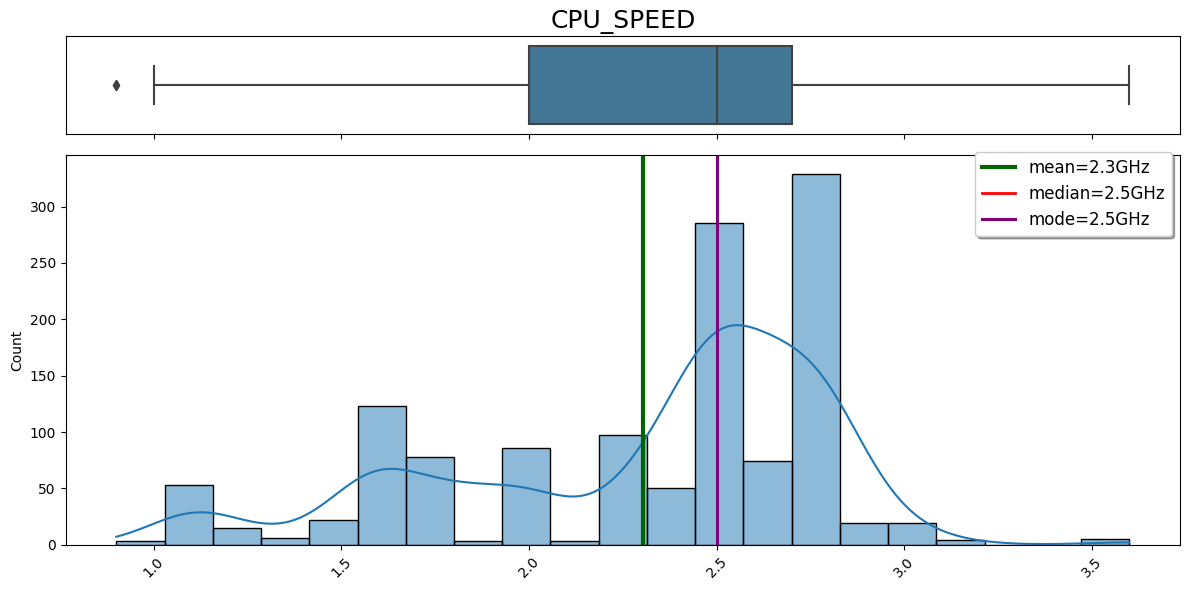

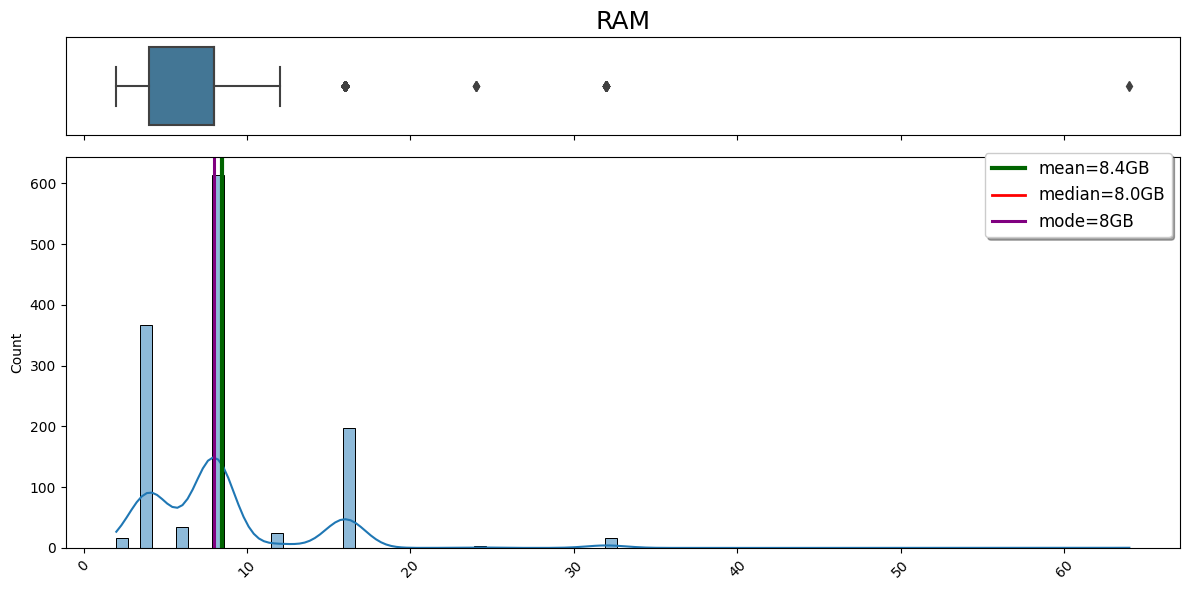

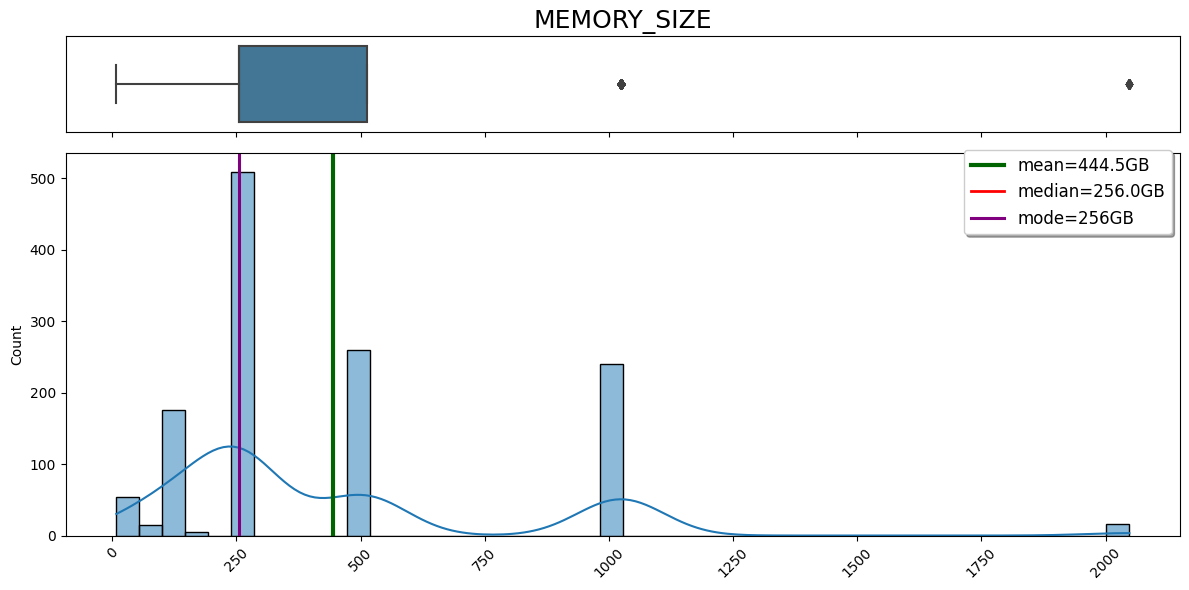

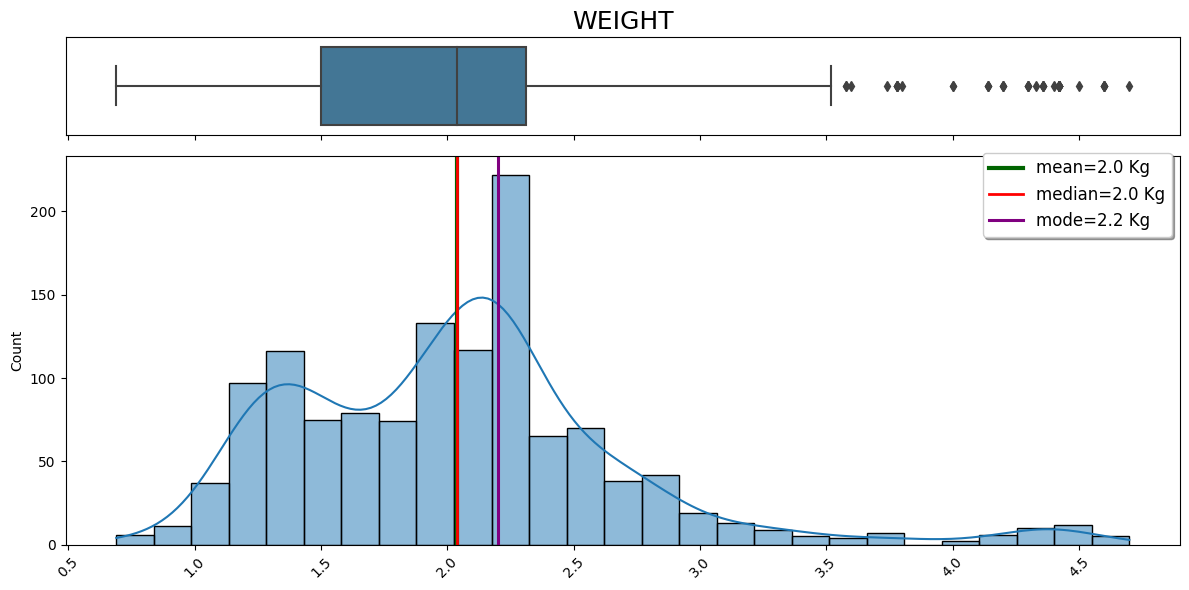

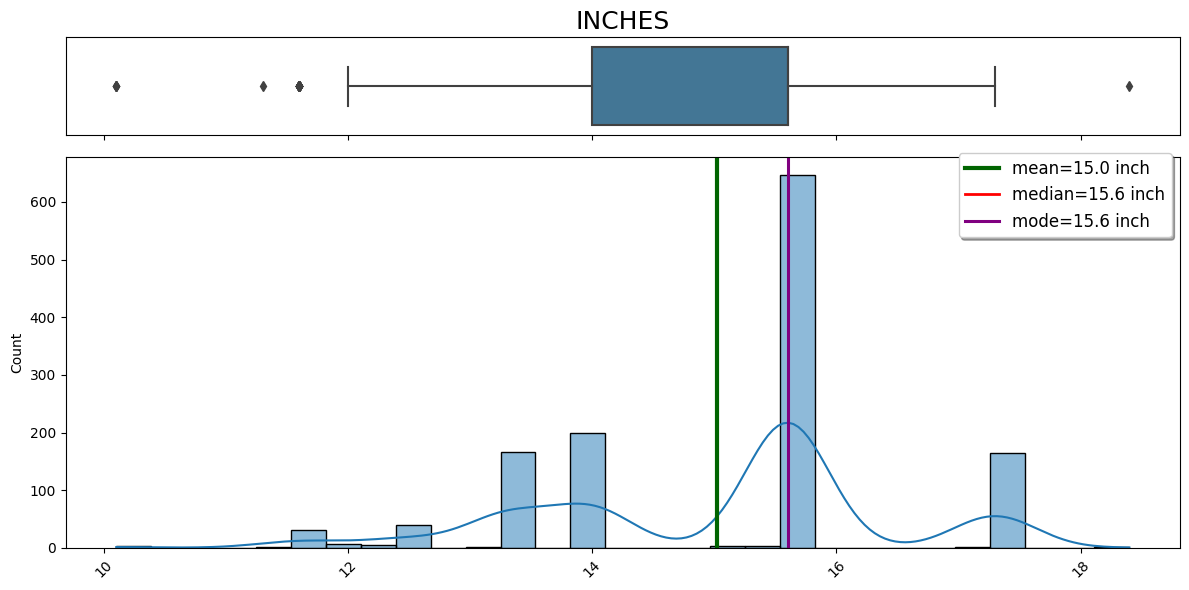

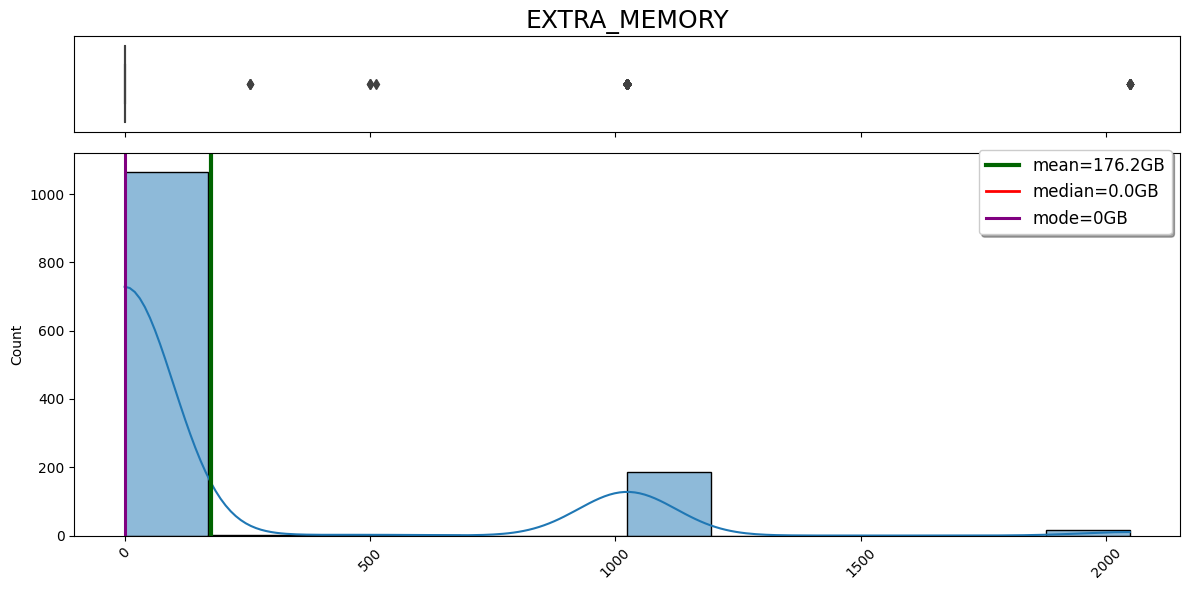

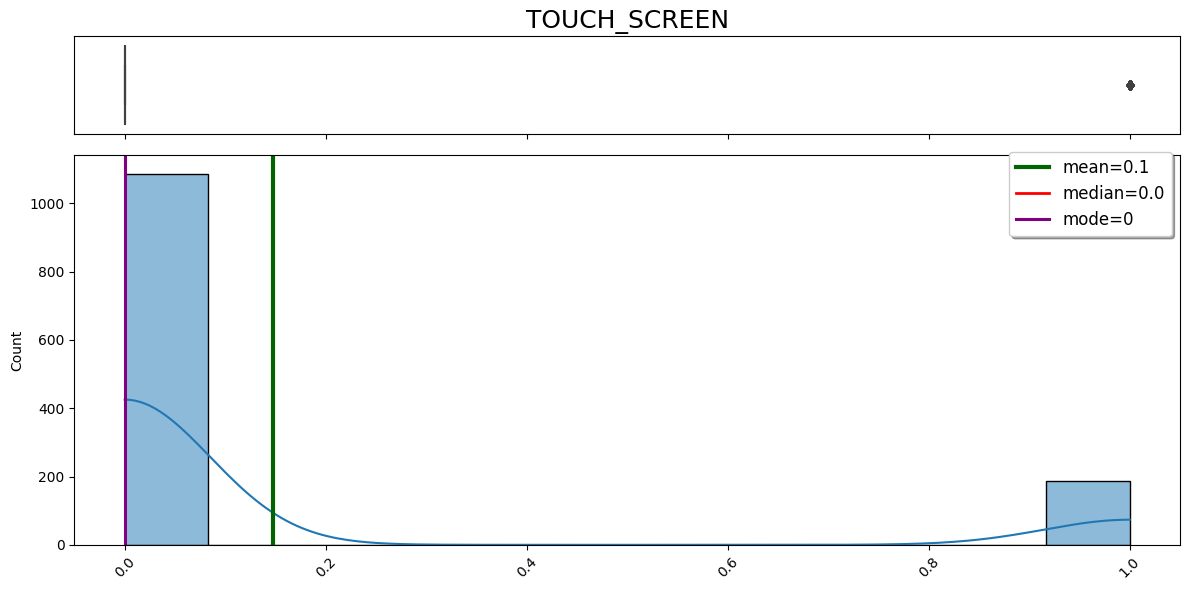

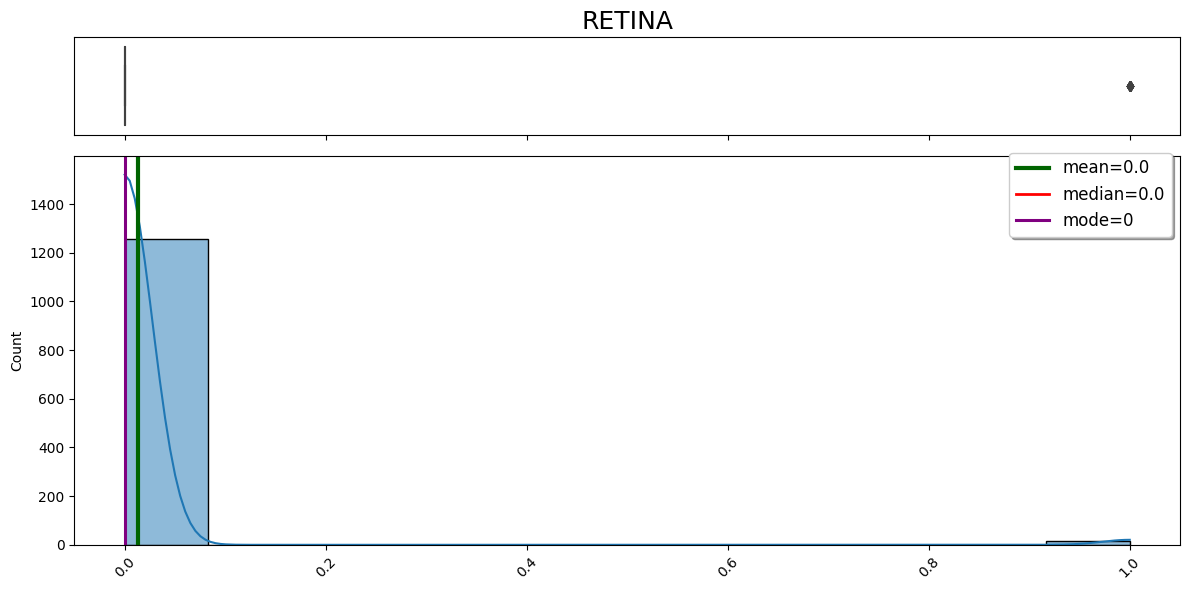

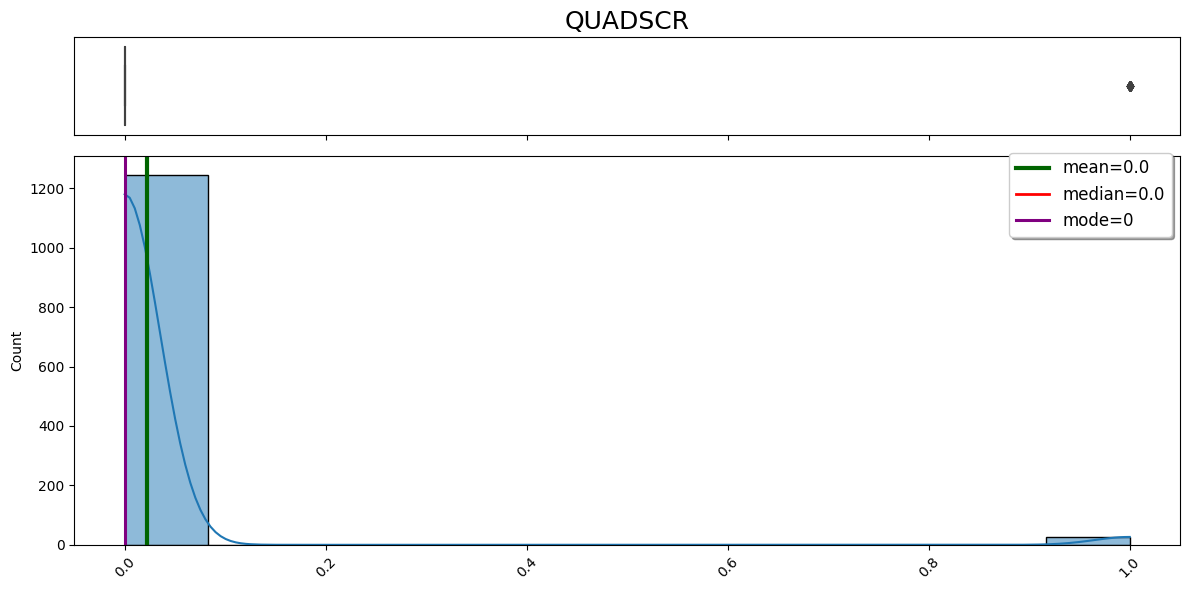

In [17]:
unit_mapping = {
    "inches": " inch",
    "price": "$",
    "ram": "GB",
    "memory_size": "GB",
    "extra_memory": "GB",
    "weight": " Kg",
    "cpu_speed": "GHz",
}

for i in df_num.columns:
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,6),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(i.upper(),fontsize=18)
    sns.boxplot(x=df_num[i], data=df_num, ax=ax[0],  palette='mako_r')
    ax[0].set_xlabel('')
    ax[0].set(yticks=[])
    sns.histplot(df_num[i],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel('')
    plt.axvline(df_num[i].mean(), color='darkgreen', linewidth=3, label='mean=' + str(np.round(df_num[i].mean(),1)) + unit_mapping.get(i, ""))
    plt.axvline(df_num[i].median(), color='red', linewidth=2, label='median='+ str(np.round(df_num[i].median(),1)) + unit_mapping.get(i, ""))
    plt.axvline(df_num[i].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df_num[i].mode()[0]) + unit_mapping.get(i, ""))
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=12, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()
    print('\n\n')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1274 non-null   category
 1   type_name          1274 non-null   category
 2   touch_screen       1274 non-null   int8    
 3   screen_resolution  1274 non-null   category
 4   cpu_name           1274 non-null   category
 5   cpu_speed          1274 non-null   float64 
 6   ram                1274 non-null   int16   
 7   memory_size        1274 non-null   int16   
 8   memory_type        1274 non-null   category
 9   extra_memory       1274 non-null   int16   
 10  gpu_brand          1274 non-null   category
 11  retina             1274 non-null   int8    
 12  quadscr            1274 non-null   int8    
 13  operate_sys        1274 non-null   category
 14  weight             1274 non-null   float64 
 15  price              1274 non-null   float64 
 16  inches     

<h2>
    <b>
        <span style="color:#E67E22">
            Categorical Data
        </span>
    </b>
</h2>

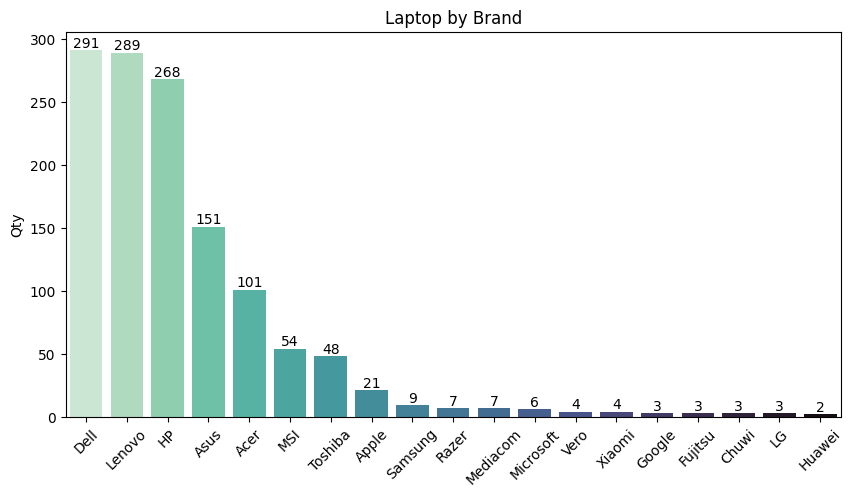

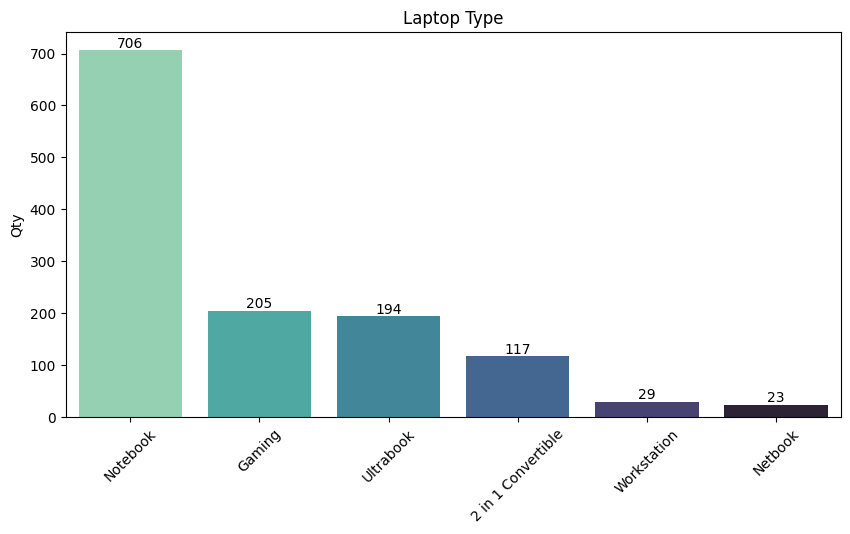

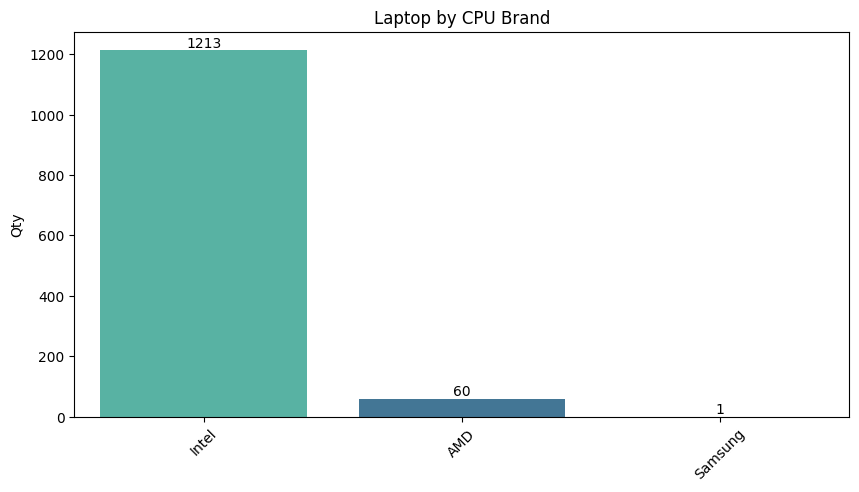

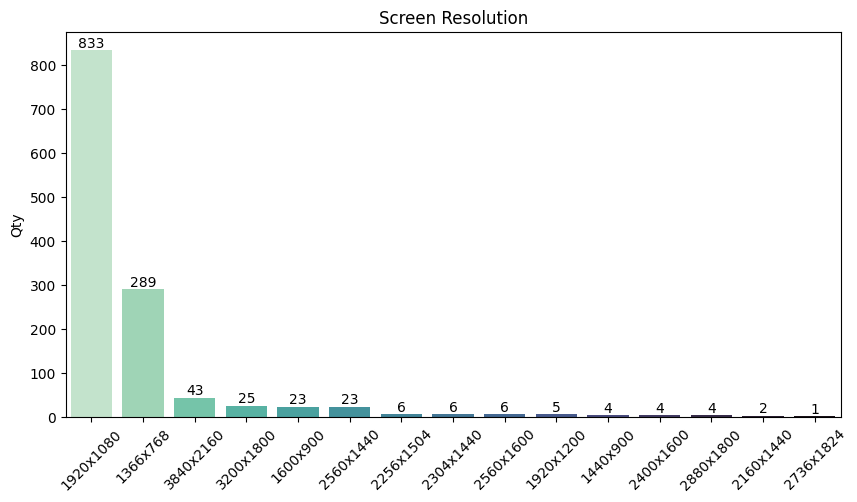

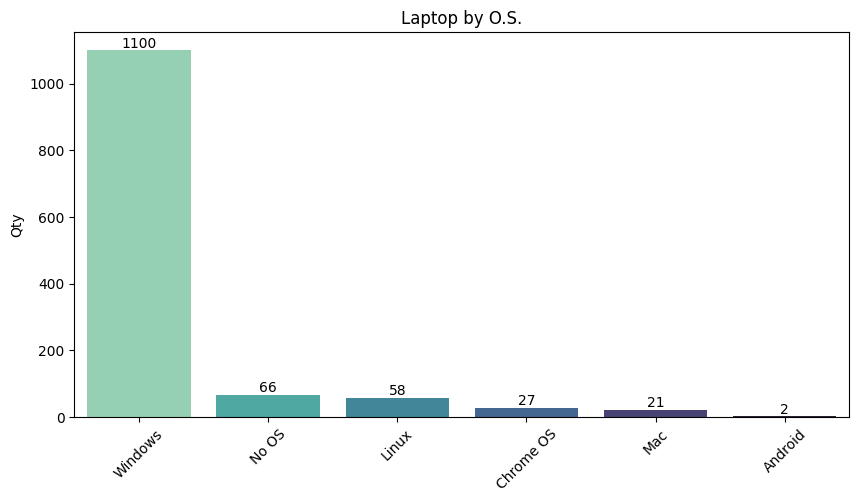

In [19]:
df_cat = df2[['company','type_name','cpu_name','screen_resolution','operate_sys']]
title_mapping = {
    "company": "Laptop by Brand",
    "type_name": "Laptop Type",
    "cpu_name": "Laptop by CPU Brand",
    "screen_resolution": "Screen Resolution",
}

for i in df_cat.columns:
    #title = title_mapping.get(i, "Laptop by O.S.")
    fig, ax  = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=df_cat[i], data=df_cat, palette='mako_r', order = df_cat[i].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('')
    ax.set_ylabel('Qty')
    ax.bar_label(ax.containers[0])
    print('\n')
    plt.title(title_mapping.get(i, "Laptop by O.S."))
    plt.show()
    print('\n')

<h2>
    <b>
        <span style="color:#E67E22">
            Basic Presumptions
         </span>
    </b>
</h2>

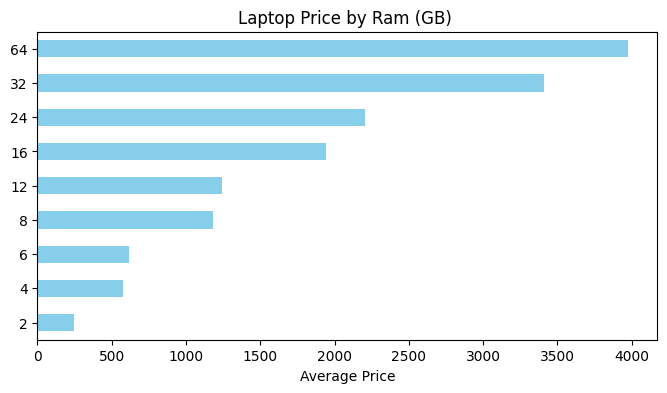

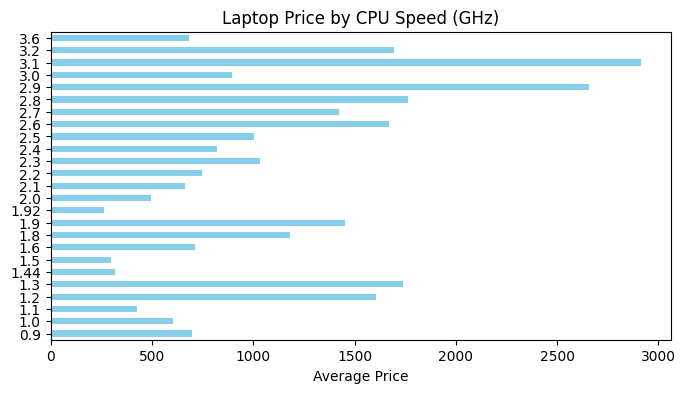

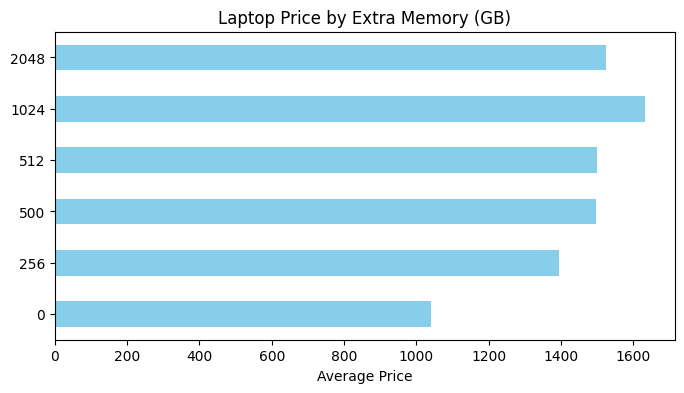

In [20]:
df_price=df2[['ram','cpu_speed','extra_memory']]
relation_mapping ={
    'ram':"Ram (GB) ",
    'cpu_speed': "CPU Speed (GHz)"
}
for i in df_price.columns:
    
    fig, ax = plt.subplots(figsize=(8, 4))
    
    ratio = df2.groupby(i)['price'].mean().round(0)
    ratio.plot(kind='barh', color='skyblue', ax=ax)
    
    ax.set_title(f'Laptop Price by {relation_mapping.get(i, "Extra Memory (GB)")}')
    ax.set_xlabel('Average Price')
    #ax.set_ylabel(relation_mapping.get(i, "Extra Memory GB"))
    ax.set_ylabel('')
    
    plt.show()

In [21]:
fig = px.sunburst(df2, path=['company','ram'], values='price',color='price')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

<h2>
    <b>
        <span style="color:#E67E22">
            Data Cleaning 2
        </span>
    </b>
</h2>

In [22]:
df2[df2['cpu_name']=='Samsung']

,company,type_name,touch_screen,screen_resolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,retina,quadscr,operate_sys,weight,price,inches
1191,Samsung,2 in 1 Convertible,1,2400x1600,Samsung,2.0,4,32,flash_storage,0,ARM,0,0,Chrome OS,1.15,659.0,12.3


In [23]:
df2=df2.drop(1191)

In [24]:
df2[df2['ram']>=40]

,company,type_name,touch_screen,screen_resolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,retina,quadscr,operate_sys,weight,price,inches
1066,Asus,Gaming,0,1920x1080,Intel,2.7,64,1024,SSD,0,Nvidia,0,0,Windows,3.58,3975.0,17.3


In [25]:
df2=df2.drop(1066)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1272 non-null   category
 1   type_name          1272 non-null   category
 2   touch_screen       1272 non-null   int8    
 3   screen_resolution  1272 non-null   category
 4   cpu_name           1272 non-null   category
 5   cpu_speed          1272 non-null   float64 
 6   ram                1272 non-null   int16   
 7   memory_size        1272 non-null   int16   
 8   memory_type        1272 non-null   category
 9   extra_memory       1272 non-null   int16   
 10  gpu_brand          1272 non-null   category
 11  retina             1272 non-null   int8    
 12  quadscr            1272 non-null   int8    
 13  operate_sys        1272 non-null   category
 14  weight             1272 non-null   float64 
 15  price              1272 non-null   float64 
 16  inches     

In [27]:
df2.isnull().sum().sort_values(ascending=False)

company              0
extra_memory         0
price                0
weight               0
operate_sys          0
quadscr              0
retina               0
gpu_brand            0
memory_type          0
type_name            0
memory_size          0
ram                  0
cpu_speed            0
cpu_name             0
screen_resolution    0
touch_screen         0
inches               0
dtype: int64

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Feature Enginering </p>
     </b>
</h1>

<h3><p>Converting categorical variables is a crucial step in preparing data for machine learning models. Categorical variables represent, in this case, categories or labels, such as names, o.s., descriptions of objects, and they need to be transformed into a numerical format for many machine learning algorithms. <br>  
    
We'll use "pd.get_dummies" from the pandas library for encoding is a convenient and straightforward approach, especially when dealing with nominal categorical variables.     
    </p></h3>

In [28]:
df3=df2
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1272 non-null   category
 1   type_name          1272 non-null   category
 2   touch_screen       1272 non-null   int8    
 3   screen_resolution  1272 non-null   category
 4   cpu_name           1272 non-null   category
 5   cpu_speed          1272 non-null   float64 
 6   ram                1272 non-null   int16   
 7   memory_size        1272 non-null   int16   
 8   memory_type        1272 non-null   category
 9   extra_memory       1272 non-null   int16   
 10  gpu_brand          1272 non-null   category
 11  retina             1272 non-null   int8    
 12  quadscr            1272 non-null   int8    
 13  operate_sys        1272 non-null   category
 14  weight             1272 non-null   float64 
 15  price              1272 non-null   float64 
 16  inches     

In [29]:
df3=df3.join(pd.get_dummies(df3.company))
df3=df3.join(pd.get_dummies(df3.type_name))
df3=df3.join(pd.get_dummies(df3.screen_resolution))
df3 = df3.join(pd.get_dummies(df3['cpu_name'], prefix='cpu_'))
df3=df3.join(pd.get_dummies(df3.memory_type))
df3=df3.join(pd.get_dummies(df3['gpu_brand'], prefix='gpu_'))
df3=df3.join(pd.get_dummies(df3.operate_sys))
df3=df3.drop(['company','type_name','screen_resolution','cpu_name','memory_type','gpu_brand','operate_sys'], axis=1)

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1273
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   touch_screen        1272 non-null   int8   
 1   cpu_speed           1272 non-null   float64
 2   ram                 1272 non-null   int16  
 3   memory_size         1272 non-null   int16  
 4   extra_memory        1272 non-null   int16  
 5   retina              1272 non-null   int8   
 6   quadscr             1272 non-null   int8   
 7   weight              1272 non-null   float64
 8   price               1272 non-null   float64
 9   inches              1272 non-null   float64
 10  Acer                1272 non-null   bool   
 11  Apple               1272 non-null   bool   
 12  Asus                1272 non-null   bool   
 13  Chuwi               1272 non-null   bool   
 14  Dell                1272 non-null   bool   
 15  Fujitsu             1272 non-null   bool   
 16  Google     

In [31]:
df_original = df
df=df3

In [32]:
target_corr=df.corr()['price'].apply(abs).sort_values(ascending=False)
target_corr

price           1.000000
ram             0.745537
Notebook        0.552360
SSD             0.507293
1366x768        0.453162
                  ...   
Asus            0.012528
1440x900        0.007667
Xiaomi          0.000020
cpu__Samsung         NaN
gpu__ARM             NaN
Name: price, Length: 66, dtype: float64

<h3>
    <b>
        <p>One limitation for this encoding, it can lead to an increase in the dimensionality of the dataset, especially if there are many unique categories in a variable.<br> 
           For that reason we are going to limit our dimension to our first 20 most important features values.
        </p>
    </b>
</h3>

In [33]:
selected_features = target_corr[:20].index
selected_features

Index(['price', 'ram', 'Notebook', 'SSD', '1366x768', 'cpu_speed', 'HDD',
       'Gaming', '3840x2160', 'gpu__Nvidia', 'extra_memory', 'Ultrabook',
       'Workstation', 'Windows', 'Razer', '2560x1440', 'Acer', 'weight',
       'flash_storage', 'gpu__AMD'],
      dtype='object')

In [34]:
df = df[selected_features]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1272 non-null   float64
 1   ram            1272 non-null   int16  
 2   Notebook       1272 non-null   bool   
 3   SSD            1272 non-null   bool   
 4   1366x768       1272 non-null   bool   
 5   cpu_speed      1272 non-null   float64
 6   HDD            1272 non-null   bool   
 7   Gaming         1272 non-null   bool   
 8   3840x2160      1272 non-null   bool   
 9   gpu__Nvidia    1272 non-null   bool   
 10  extra_memory   1272 non-null   int16  
 11  Ultrabook      1272 non-null   bool   
 12  Workstation    1272 non-null   bool   
 13  Windows        1272 non-null   bool   
 14  Razer          1272 non-null   bool   
 15  2560x1440      1272 non-null   bool   
 16  Acer           1272 non-null   bool   
 17  weight         1272 non-null   float64
 18  flash_storage

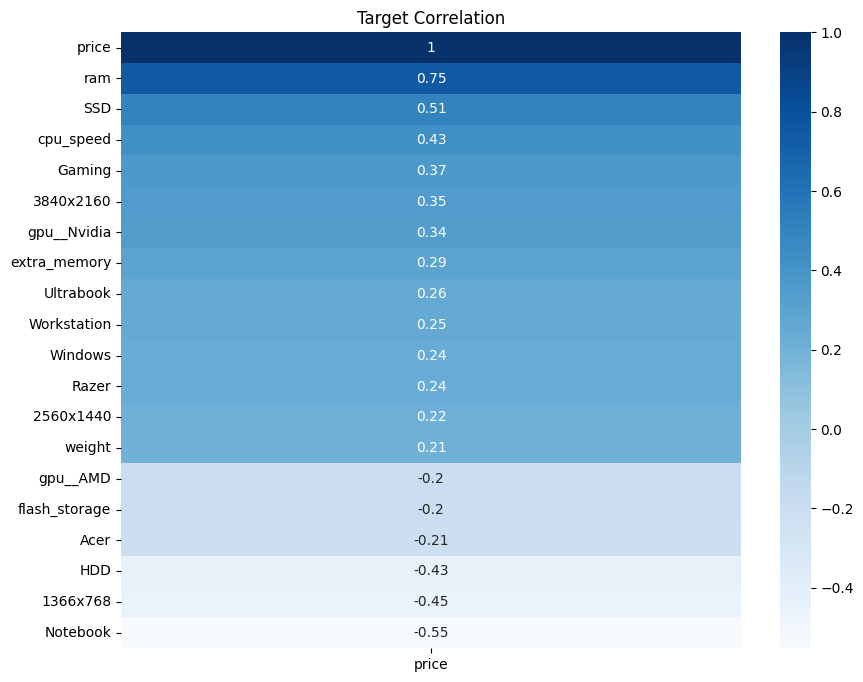

In [35]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), annot = True, cmap = 'Blues')
plt.title('Target Correlation')
plt.show()

<Axes: >

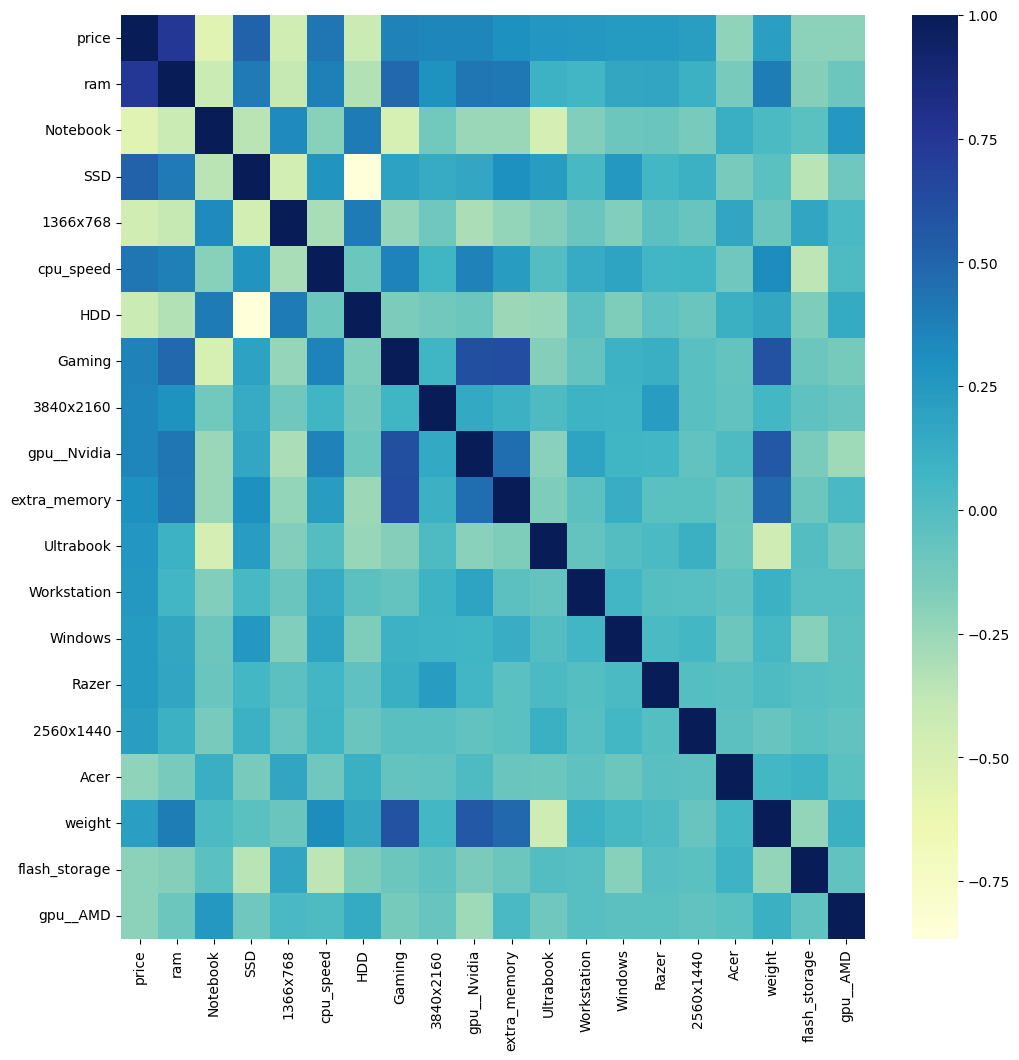

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap = "YlGnBu")

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Data Samples Options </p>
     </b>
</h1>

<h3>
    <b>
        <p>A well-chosen sample ensures computational efficiency, aids in model training and validation, and allows for the detection of patterns and trends indicative of the overall dataset. <br>
        </p>
        <p>In our case, we will be working with three different sample sizes. 
        </p>
    </b>
</h3>

<h2>
    <b>
        <span style="color:#E67E22">
            First Subset of Sample
        </span>
    </b>
</h2>

<h3>
    <b>
        <p>The first one encompasses nearly the entire population, excluding duplicated data that has already been removed, and excluding columns that, in our judgment, did not represent a significant value in our modeling efforts.
        <p>
      </b>
    
<h3>

In [37]:
df

,price,ram,Notebook,SSD,1366x768,cpu_speed,HDD,Gaming,3840x2160,gpu__Nvidia,extra_memory,Ultrabook,Workstation,Windows,Razer,2560x1440,Acer,weight,flash_storage,gpu__AMD
0,1339.69,8,False,True,False,2.3,False,False,False,False,0,True,False,False,False,False,False,1.37,False,False
1,898.94,8,False,False,False,1.8,False,False,False,False,0,True,False,False,False,False,False,1.34,True,False
2,575.00,8,True,True,False,2.5,False,False,False,False,0,False,False,False,False,False,False,1.86,False,False
3,2537.45,16,False,True,False,2.7,False,False,False,False,0,True,False,False,False,False,False,1.83,False,True
4,1803.60,8,False,True,False,3.1,False,False,False,False,0,True,False,False,False,False,False,1.37,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,720.32,4,True,False,True,2.5,True,False,False,True,0,False,False,True,False,False,False,2.20,False,False
1270,638.00,4,False,True,False,2.5,False,False,False,False,0,False,False,True,False,False,False,1.80,False,False
1271,1499.00,16,False,True,False,2.5,False,False,False,False,0,False,False,True,False,False,False,1.30,False,False
1272,229.00,2,True,False,True,1.6,False,False,False,False,0,False,False,True,False,False,False,1.50,True,False


In [38]:
# We could use Label Encoding or One-Hot Encoding to handle Categorical Columns 
# label_encoder= LabelEncoder()
# for col in cat_columns :
#     df0[col] = label_encoder.fit_transform(df0[col].astype(str))

In [39]:
#This code is designed to comparatively visualize possibles samples and the presence of features and the 
#quantity of outliers in ifferent column sets with respect to a main set.

# col_1 = ['inches', 'ram', 'weight', 'price', 'touch_screen', 'cpu_speed', 'memory_size', 'extra_memory', 'retina', 'quadscr']
# col_2 = ['inches', 'ram', 'weight', 'price', 'touch_screen', 'cpu_speed', 'memory_size', 'extra_memory']
# col_3 = ['inches', 'ram', 'weight', 'price', 'touch_screen', 'cpu_speed', 'memory_size']
# col_4 = ['inches', 'ram', 'weight', 'price', 'touch_screen', 'cpu_speed']

# columns_lists = [col_1, col_2, col_3, col_4]
# top = ['inches', 'ram', 'weight', 'price', 'touch_screen', 'cpu_speed', 'memory_size', 'extra_memory', 'retina', 'quadscr']

# table = PrettyTable(['Set','Price',  'Ram','CPU Speed', 'Touch Screen','Inches','Weight', 'Memory Size', 'Extra Memory', 'Retina', 'Quadscr', 'Outliners'])

# for i, selection in enumerate(columns_lists, start=1):
#     row = [i] + ['X' if col in selection else '' for col in top]
#     outliers = detect_outliers(df, 0, selection)
#     row.append(len(outliers))
#     table.add_row(row)
    
# print(table)

In [40]:
# 'detect_outliers' function is designed to identify and count outliers in a dataset. 

# idx = detect_outliers(df,0,['inches', 'ram', 'weight', 'price', 'touch_screen', 'cpu_speed', 'memory_size', 'extra_memory', 'retina', 'quadscr'])
# print ('Total Ouliers is : ',len(idx))

# outliers_df = df.loc[idx]
# clean_df = df.drop(idx,axis=0)

# clean_df.shape

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Modeling </p>
     </b>
</h1>

<h2>
    <b>
        <span style="color:#E67E22">
            Metrics
        </span>
    </b>
</h2>

In [41]:
results_list=[]
def Results(name,rmse, mae, mse, r2, train_score, test_score):
    results_list.append({
            'Model': name,
            'RMSE ($)': rmse,
            'R²': r2,
            'MAE': mae,
            'MSE' : mse,
            #'Evaluation Time (sec)': evaluation_time,
            #'Grid Search Time (sec)' : search_time,
            'Test Score': test_score,
            'Train Score': train_score,         
            #'Best Param.': best_params,
        })
    
def plot_feature_importance (x,model,Model_name):
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,model.coef_)
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

def plot_feature_importance_2 (x,model,Model_name):
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,model.feature_importances_)
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

<h2>
    <b>
        <span style="color:#E67E22">
            Predictor Variables & Target Variable
        </span>
    </b>
</h2>

In [42]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

<h2>
    <b>
        <span style="color:#E67E22">
            Normalization
        </span>
    </b>
</h2>

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>
    <b>
        <span style="color:#E67E22">
            Modeling with Default Parameters
        </span>
    </b>
</h2>

In [44]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'XGBRegressor': XGBRegressor()
  }

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
  
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    Results(name,rmse, mae, mse, r2, train_score, test_score)

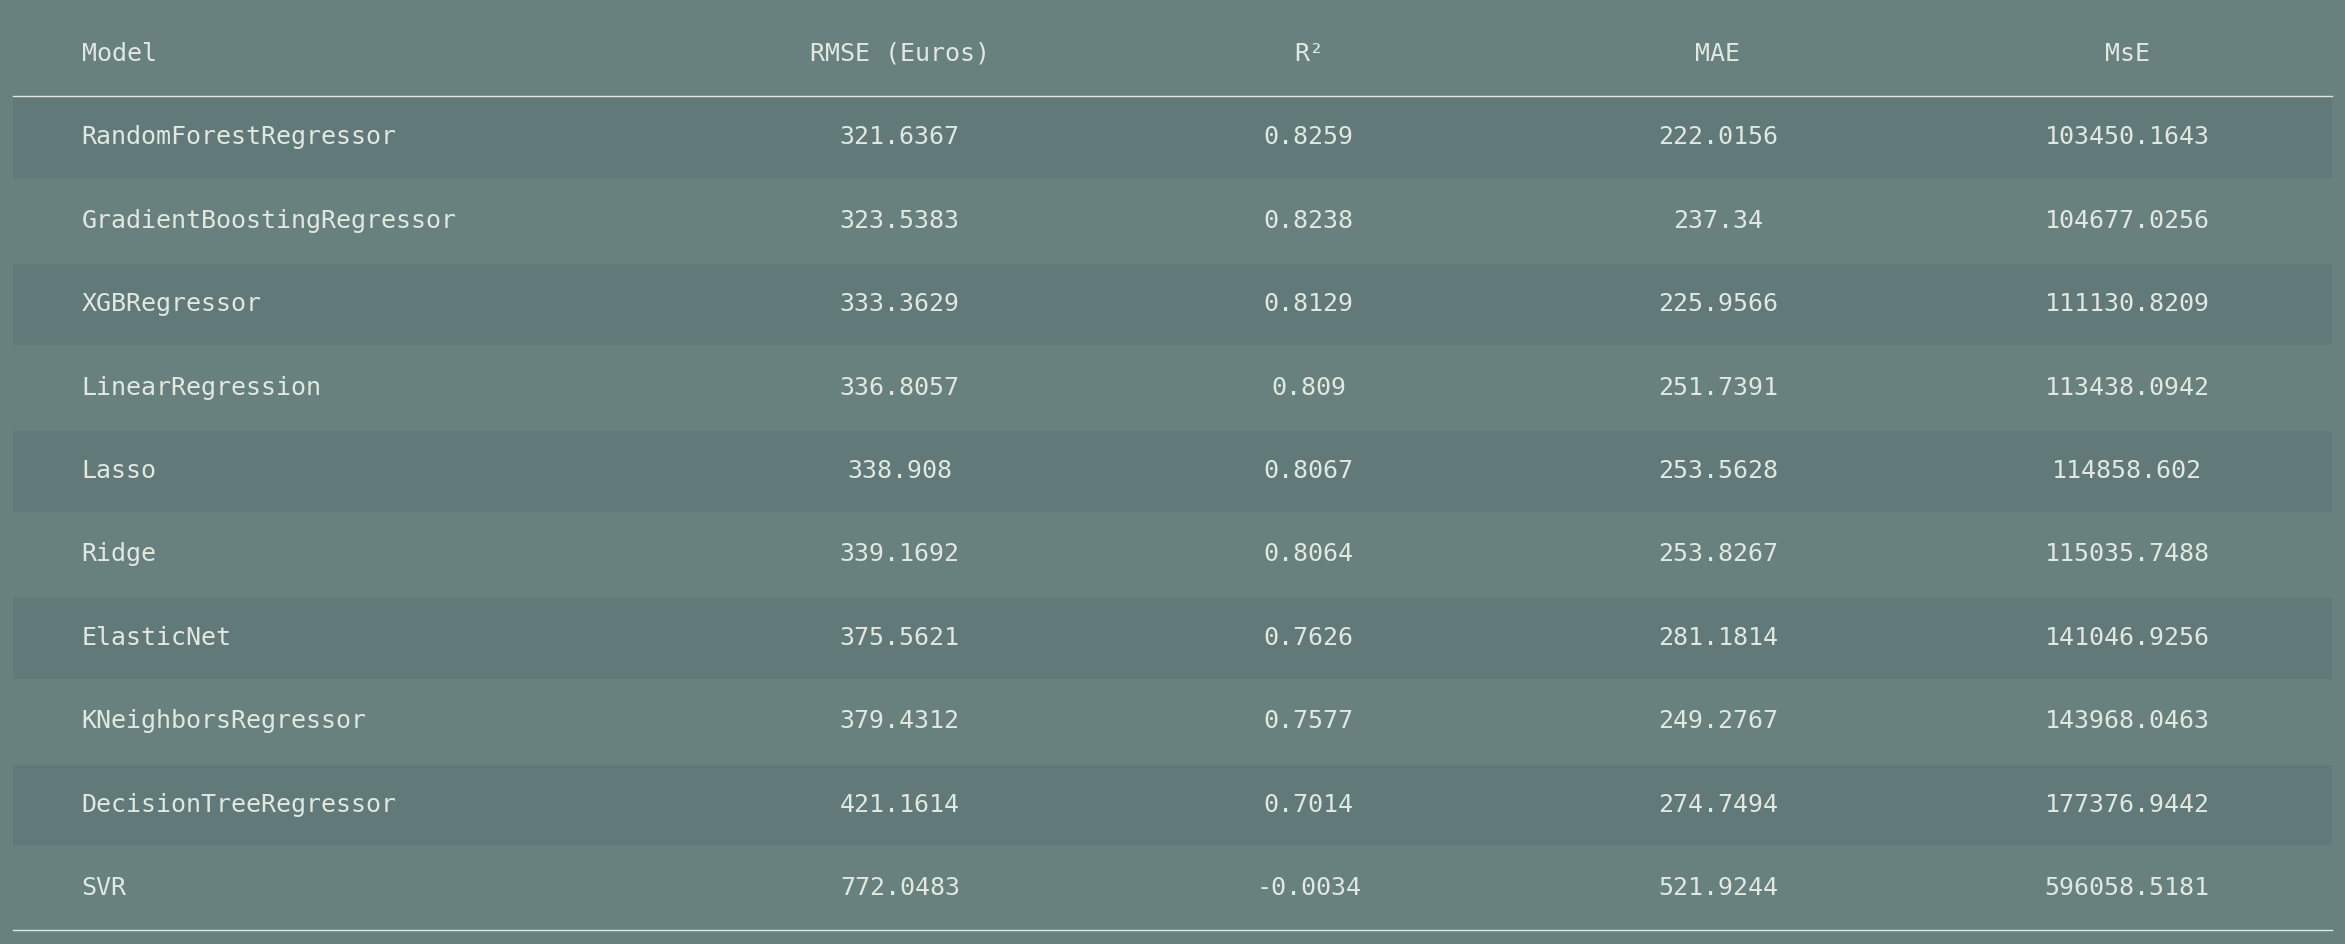

In [45]:
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by=['RMSE ($)', 'R²', 'MAE', 'MSE'], ascending=[True, False, False, False]).round(4)

results_df = results_df[['Model' , 'RMSE ($)', 'R²', 'MAE', 'MSE']]

row_colors = {
    "even": "#627979",
    "odd": "#68817e",
}

bg_color = row_colors["odd"]
text_color = "#e0e8df"

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

table_col_defs = [
    ColDef("Model", width=5, title="Model", textprops={"ha": "left"}),
    ColDef("RMSE ($)", width=3, title="RMSE (Euros)", textprops={"ha": "center"}),
    ColDef("R²", width=3, title="R²", textprops={"ha": "center"}),
    ColDef("MAE", width=3, title="MAE", textprops={"ha": "center"}),
    ColDef("MSE", width=3, title="MsE", textprops={"ha": "center"}),
]

fig, ax = plt.subplots(figsize=(30, 12))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color) 


table = Table(
    results_df,
    column_definitions=table_col_defs,
    index_col="Model",
    textprops={"fontsize": 18, "ha": "center"},
    row_dividers = True,
    footer_divider=True,
    row_divider_kw={"color": bg_color, "lw": 2},
    even_row_color=row_colors["even"],
    column_border_kw={"color": bg_color, "lw": 2},
    ax=ax
)
plt.show()

<h2>
    <b>
        <span style="color:#E67E22">
            Looking for Best Parameters for each Model using Grid Search
        </span>
    </b>
</h2>

In [46]:
def find_best_model(X_train_scaled, y_train, model, param_grid):
    cv = 5  # Cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', return_train_score=False)
    start_time = time.time()
    grid_search.fit(X_train_scaled, y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    return best_model,elapsed_time, best_params

def evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test):
    
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    return rmse, train_score, test_score, elapsed_time, mae, mse,r2 

def find_best_model_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, model, param_grid):
    # Looking for best model
    best_model, search_time, best_params = find_best_model(X_train_scaled, y_train, model, param_grid)
    
    # Evaluating model
    rmse, train_score, test_score,evaluation_time, mae, mse,r2   = evaluate_model(best_model, X_train_scaled, y_train, X_test_scaled, y_test)
    
    return rmse, train_score, test_score, search_time,evaluation_time, best_params, mae, mse,r2  


def mods(X_train_scaled, y_train, X_test_scaled, y_test):
    best_param = []
    results_list = []
    models = {
        'DecisionTreeRegresso': {
            'model': DecisionTreeRegressor(),
            'param_grid': {
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2']
            }
        },
        'Ridge': {
            'model': Ridge(),
            'param_grid': {
                'alpha': [0.1, 0.5, 1.0, 10.0]
            }
        },
        'LinearRegression': {
            'model': LinearRegression(),
            'param_grid': {
                'fit_intercept': [True, False]
            }
        },
        'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'param_grid': {
                'n_estimators': [200, 500 ,800, 1000],
                'max_depth': [3, 5, 7, 10],
                'min_samples_split': [2, 10, 20],
                'min_samples_leaf': [1, 2, 4],
                'max_features': [ 'sqrt', 'log2']
            }
        },
       'XGBRegressor': {
            'model': XGBRegressor(),
            'param_grid': {
                'n_estimators': [200, 500 ,800, 1000],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7, 10],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.2, 0.6, 1.0]
            }
        },
        'LGBMRegressor': {
            'model': LGBMRegressor(),
            'param_grid': {
                'n_estimators': [200, 500 ,800, 1000],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7, 10],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.2, 0.6, 1.0]
            }
        },
        
        'GradientBoostingRegressor': {
            'model': GradientBoostingRegressor(),
            'param_grid': {
                'n_estimators': [200, 500 ,800, 1000],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7, 10],
                'min_samples_split': [2, 10, 20],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.6, 0.8, 1.0]
            }
        },

        'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'param_grid': {
            'n_neighbors': [3, 5, 10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1, 2]
        }
    },
        'Lasso': {
        'model': Lasso(),
        'param_grid': {
            'alpha': [0.1, 0.5, 1.0, 10.0]
        }
    },
        'ElasticNet': {
        'model': ElasticNet(),
        'param_grid': {
            'alpha': [0.1, 0.5, 1.0, 10.0],
            'l1_ratio': [0.1, 0.5, 0.7, 0.9]
        }
    },
        

    }
  
    
    for model_name, config in models.items():
        rmse, train_score, test_score, search_time, evaluation_time,best_params, mae, mse,r2 = find_best_model_and_evaluate(X_train, y_train, X_test, y_test, config['model'], config['param_grid'])     
        results_list.append({
            'Model': model_name,
            'RMSE ($)': rmse,
            'R²': r2,
            'MAE': mae,
            'MSE' : mse,
            'Evaluation Time (sec)': evaluation_time,
            'Grid Search Time (sec)' : search_time,
            'Test Score': test_score,
            'Train Score': train_score,         
            'Best Param.': best_params,
        })
    return results_list
     
results_list = mods(X_train_scaled, y_train, X_test_scaled, y_test)

results_df = pd.DataFrame(results_list)

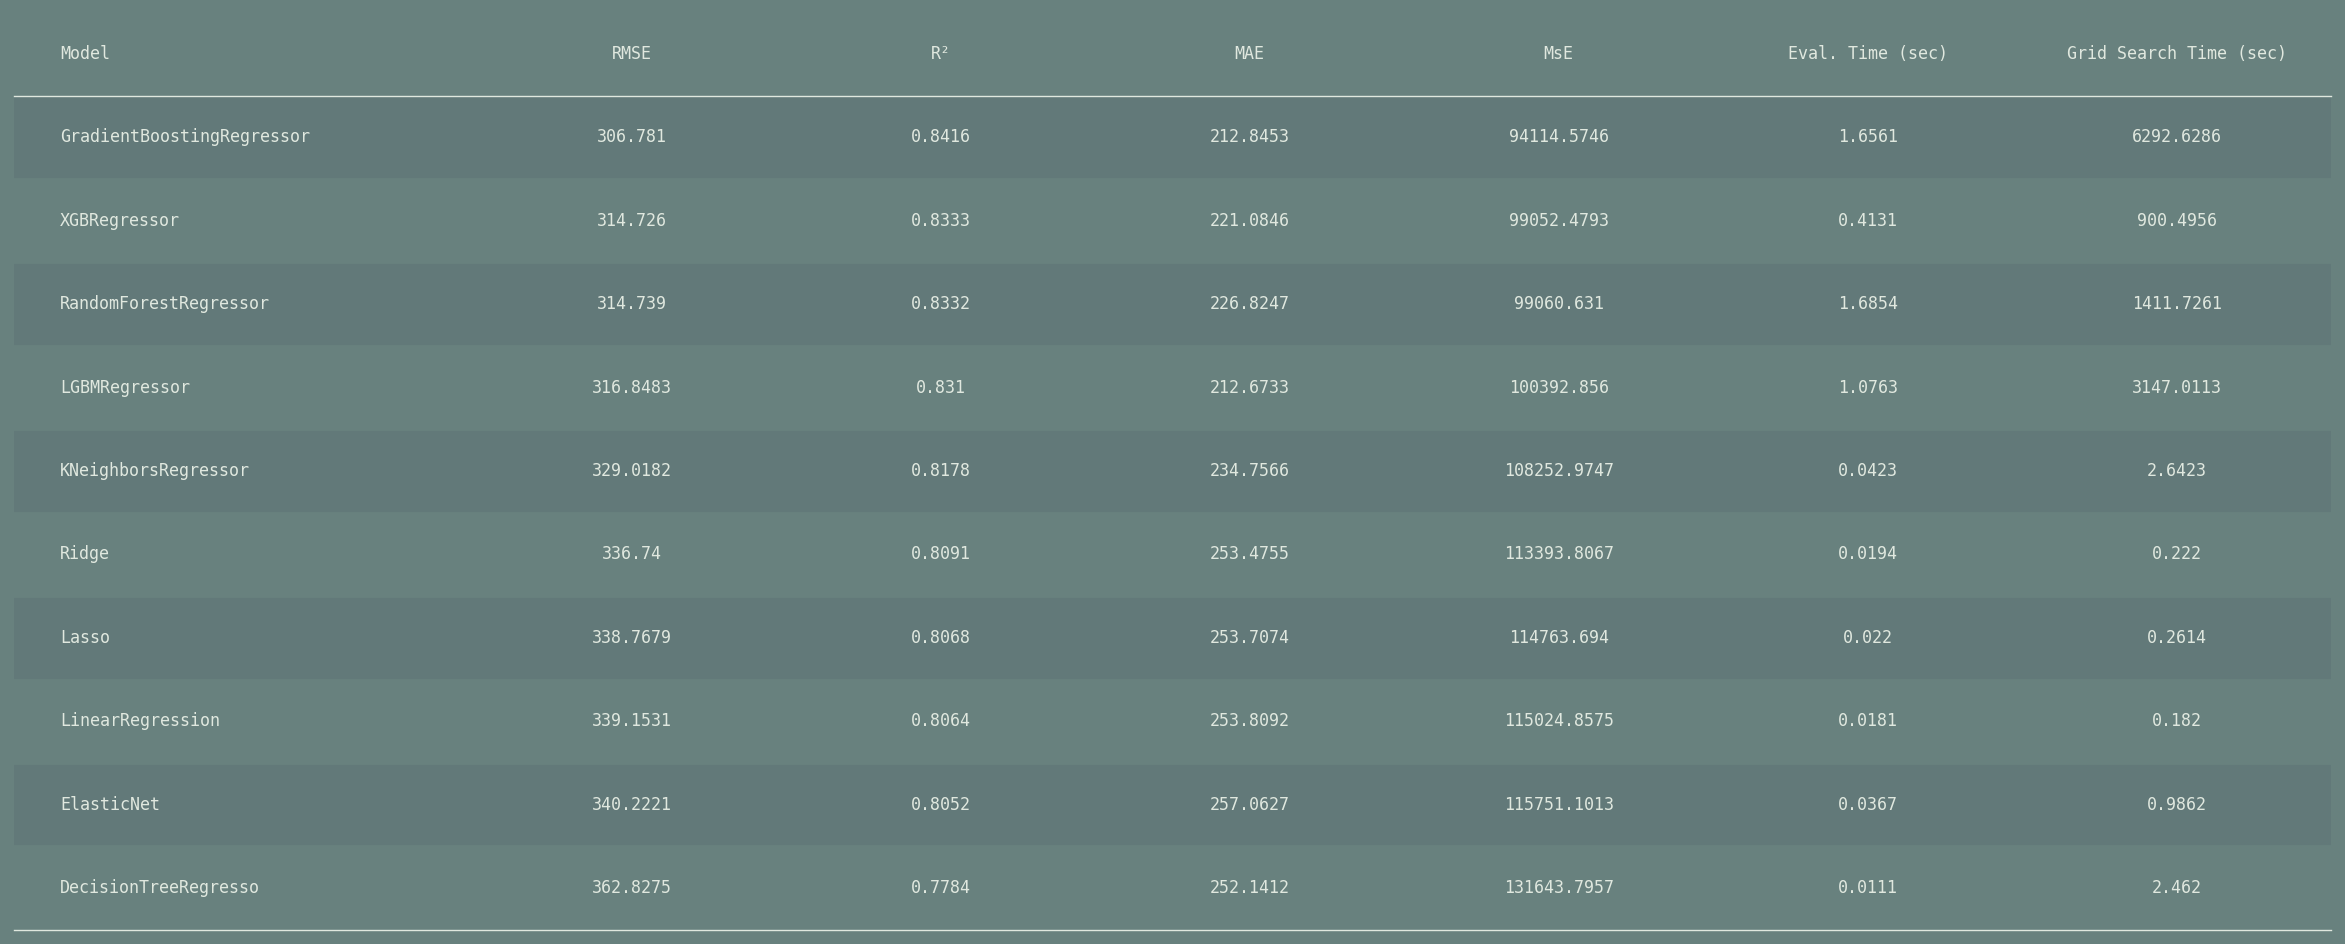

In [47]:
results_df = results_df.sort_values(by=['RMSE ($)', 'R²', 'MAE', 'MSE', 'Evaluation Time (sec)', 'Grid Search Time (sec)'], ascending=[True, False, False, False, False, False]).round(4)
results = results_df
results_df = results_df[['Model' , 'RMSE ($)', 'R²', 'MAE', 'MSE', 'Evaluation Time (sec)', 'Grid Search Time (sec)']]

row_colors = {
    "even": "#627979",
    "odd": "#68817e",
}

bg_color = row_colors["odd"]
text_color = "#e0e8df"

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

table_col_defs = [
    ColDef("Model", width=3, title="Model", textprops={"ha": "left"}),
    ColDef("RMSE ($)", width=2, title="RMSE", textprops={"ha": "center"}),
    ColDef("R²", width=2, title="R²", textprops={"ha": "center"}),
    ColDef("MAE", width=2, title="MAE", textprops={"ha": "center"}),
    ColDef("MSE", width=2, title="MsE", textprops={"ha": "center"}),
    ColDef("Evaluation Time (sec)", width=2, title="Eval. Time (sec)", textprops={"ha": "center"}),
    ColDef("Grid Search Time (sec)", width=2, title="Grid Search Time (sec)", textprops={"ha": "center"}),
]

fig, ax = plt.subplots(figsize=(30, 12))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color) 


table = Table(
    results_df,
    column_definitions=table_col_defs,
    index_col="Model",
    textprops={"fontsize": 12, "ha": "center"},
    row_dividers = True,
    footer_divider=True,
    row_divider_kw={"color": bg_color, "lw": 2},
    even_row_color=row_colors["even"],
    column_border_kw={"color": bg_color, "lw": 2},
    ax=ax
)
plt.show()

In [48]:
best_model = results.iloc[0]
model_name = best_model['Model']
best_params = best_model['Best Param.']
model_class = globals()[model_name]
best_model_instance = model_class(**best_params)

In [49]:
best_model_instance.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10,
                          min_samples_split=20, n_estimators=800,
                          subsample=0.6)

In [50]:
y_pred = best_model_instance.predict(X_test_scaled)

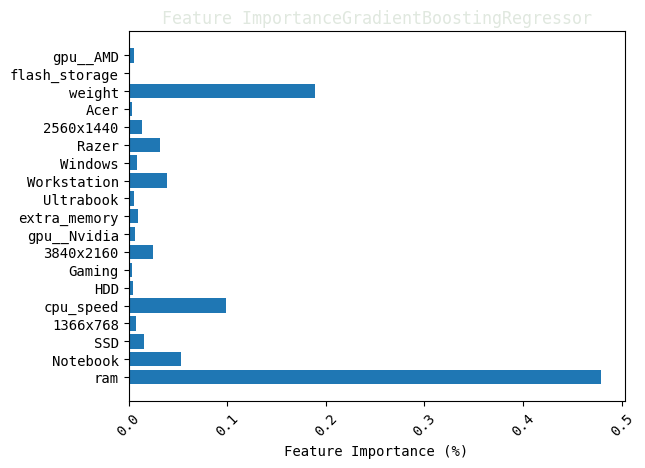

In [51]:
plot_feature_importance_2(X,best_model_instance,model_name)

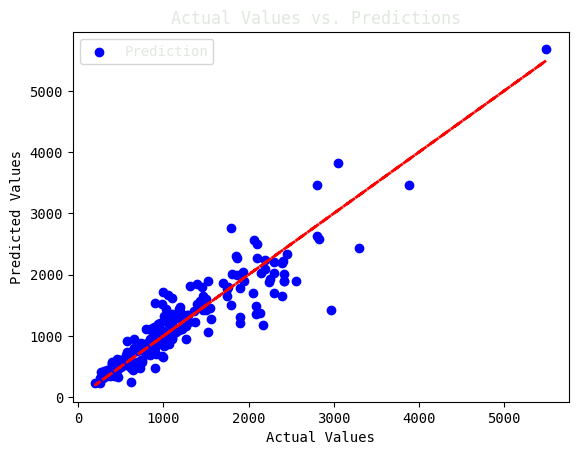

In [52]:
plt.scatter(y_test, y_pred, color='blue', label='Prediction')
plt.plot(y_test, y_test, linestyle='--', color='red', linewidth=2 )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs. Predictions ')
plt.legend()
plt.show()

<h2>
    <b>
        <span style="color:#E67E22">
            Looking for Best Parameters for each Model using Optuna
        </span>
    </b>
</h2>

In [53]:
results_list_opt = []
def Results_opt(modelo_name,best_params, y_test, y_pred_test,elapsed_time):
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    results_list_opt.append({
            'Model': modelo_name,
            'RMSE (€)': rmse_test,
            'R²': r2_test,
            'MAE': mae_test,
            'MSE' : mse_test,
            'Best Param.': best_params,
            'Time' : elapsed_time,
        })
    return results_list_opt

In [54]:

def optimize_model(model_cls, params, X_train_scaled, y_train, X_test_scaled, y_test, n_trials=100):
    global model_reg, model_reg_name
    start_time = time.time()

    def objective(trial):
        #Create dictionary, model_params holding the names of parameters and their values. 
        model_params = {param_name: trial.suggest_float(param_name, *param_range[1:], log=param_range[2])
                        if param_range[0] == 'float'
                        else trial.suggest_int(param_name, *param_range[1:])
                        for param_name, param_range in params.items()}

        model = model_cls(**model_params)
        y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=5)
        return sqrt(mean_squared_error(y_train, y_pred))

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)

    best_params = study.best_params
    best_model = model_cls(**best_params)
    best_model.fit(X_train_scaled, y_train)
    y_pred_test = best_model.predict(X_test_scaled)

    model_reg = model_cls
    model_reg_name = model_cls.__name__
    
    end_time = time.time()
    elapsed_time = end_time - start_time

    Results_opt(model_reg_name, best_params, y_test, y_pred_test,elapsed_time)

# RandomForestRegressor
rf_params = {'n_estimators': ('int', 200, 1000),'max_depth': ('int', 2, 10),'min_samples_split': ('int', 2, 20),'min_samples_leaf': ('int', 1, 10),'max_features': ('float', 0.1, 1.0)}
optimize_model(RandomForestRegressor, rf_params, X_train_scaled, y_train, X_test_scaled, y_test)

# XGBRegressor
xgb_params = {'n_estimators': ('int', 200,1000),'max_depth': ('int', 2, 10),'learning_rate': ('float', 0.01, 0.1),'subsample': ('float', 0.06, 1.0),'colsample_bytree': ('float', 0.2, 1.0), 'min_child_weight':('int', 1, 100),}
optimize_model(XGBRegressor, xgb_params, X_train_scaled, y_train, X_test_scaled, y_test)

# GBRegressor
gb_params = {'n_estimators': ('int', 200, 1000),'max_depth': ('int', 2, 10),'learning_rate': ('float', 0.01, 0.1),'min_samples_split': ('int', 2, 20),'min_samples_leaf': ('int', 1, 10),'max_features': ('float', 0.1, 1.0)}
optimize_model(GradientBoostingRegressor, gb_params, X_train_scaled, y_train, X_test_scaled, y_test)

#  LGBMRegressor
lgbm_params = {'n_estimators': ('int', 200, 1000), 'learning_rate': ('float', 0.01, 0.1),'max_depth': ('int', 2, 10), 'num_leaves': ('int', 10, 100), 'subsample': ('float', 0.6, 1.0),'colsample_bytree': ('float', 0.2, 1.0)}
optimize_model(LGBMRegressor, lgbm_params, X_train_scaled, y_train, X_test_scaled, y_test)



In [55]:
results_list_opt = pd.DataFrame(results_list_opt)

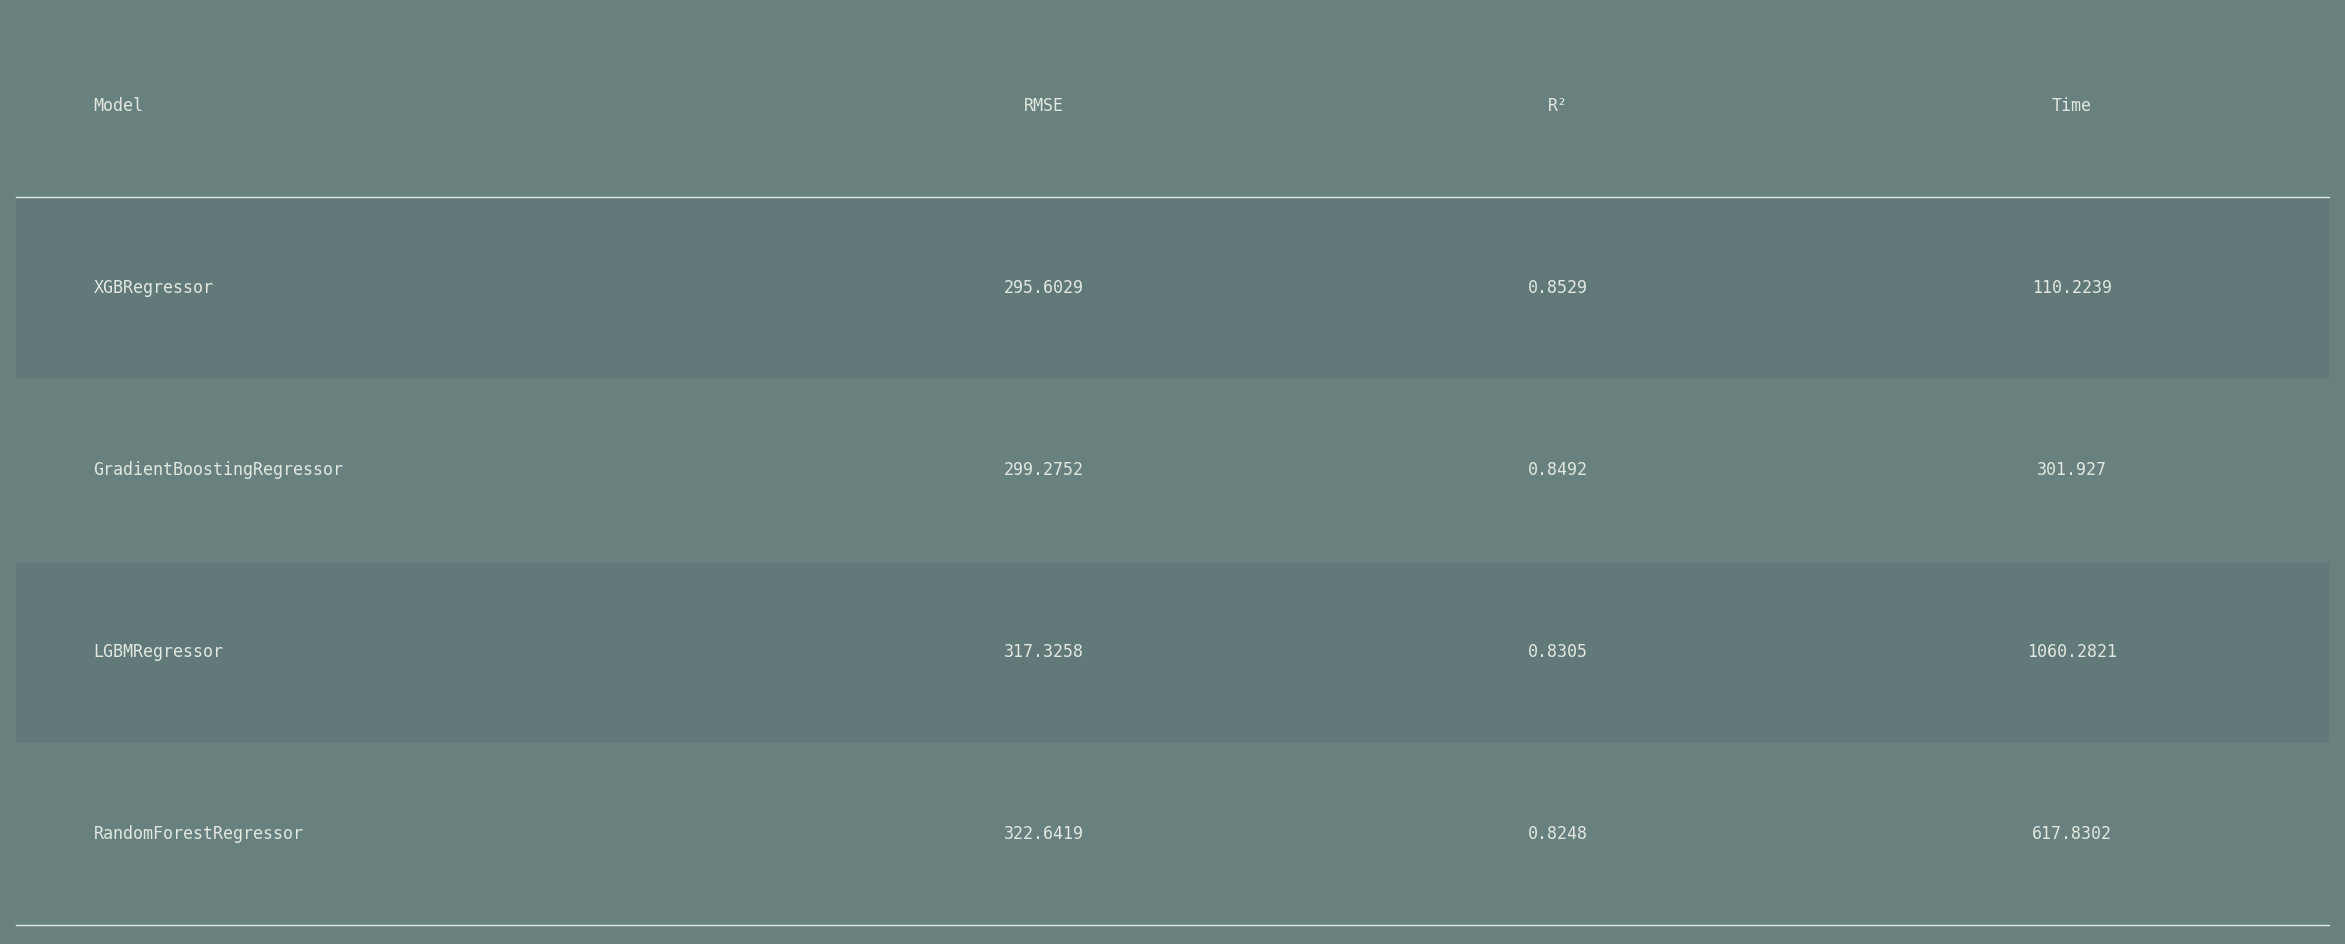

In [56]:
results_list_opt = results_list_opt.sort_values(by=['RMSE (€)', 'R²'], ascending=[True, False]).round(4)
results_opt = results_list_opt
results_list_table_1 = results_list_opt[['Model' , 'RMSE (€)', 'R²', 'Time']]
results_list_table_2 = results_list_opt[['Model' , 'Best Param.']]

row_colors = {
    "even": "#627979",
    "odd": "#68817e",
}

bg_color = row_colors["odd"]
text_color = "#e0e8df"

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

table_col_defs = [
    ColDef("Model", width=3, title="Model", textprops={"ha": "left"}),
    ColDef("RMSE (€)", width=2, title="RMSE", textprops={"ha": "center"}),
    ColDef("R²", width=2, title="R²", textprops={"ha": "center"}),
    ColDef("Time", width=2, title="Time", textprops={"ha": "center"}),
    ColDef("Best Param.", width=4, title="Best Param.", textprops={"ha": "center"}),  
]

fig, ax = plt.subplots(figsize=(30, 12))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color) 


table = Table(
    results_list_table_1,
    column_definitions=table_col_defs,
    index_col="Model",
    textprops={"fontsize": 12, "ha": "center"},
    row_dividers = True,
    footer_divider=True,
    row_divider_kw={"color": bg_color, "lw": 2},
    even_row_color=row_colors["even"],
    column_border_kw={"color": bg_color, "lw": 2},
    ax=ax
)
plt.show()

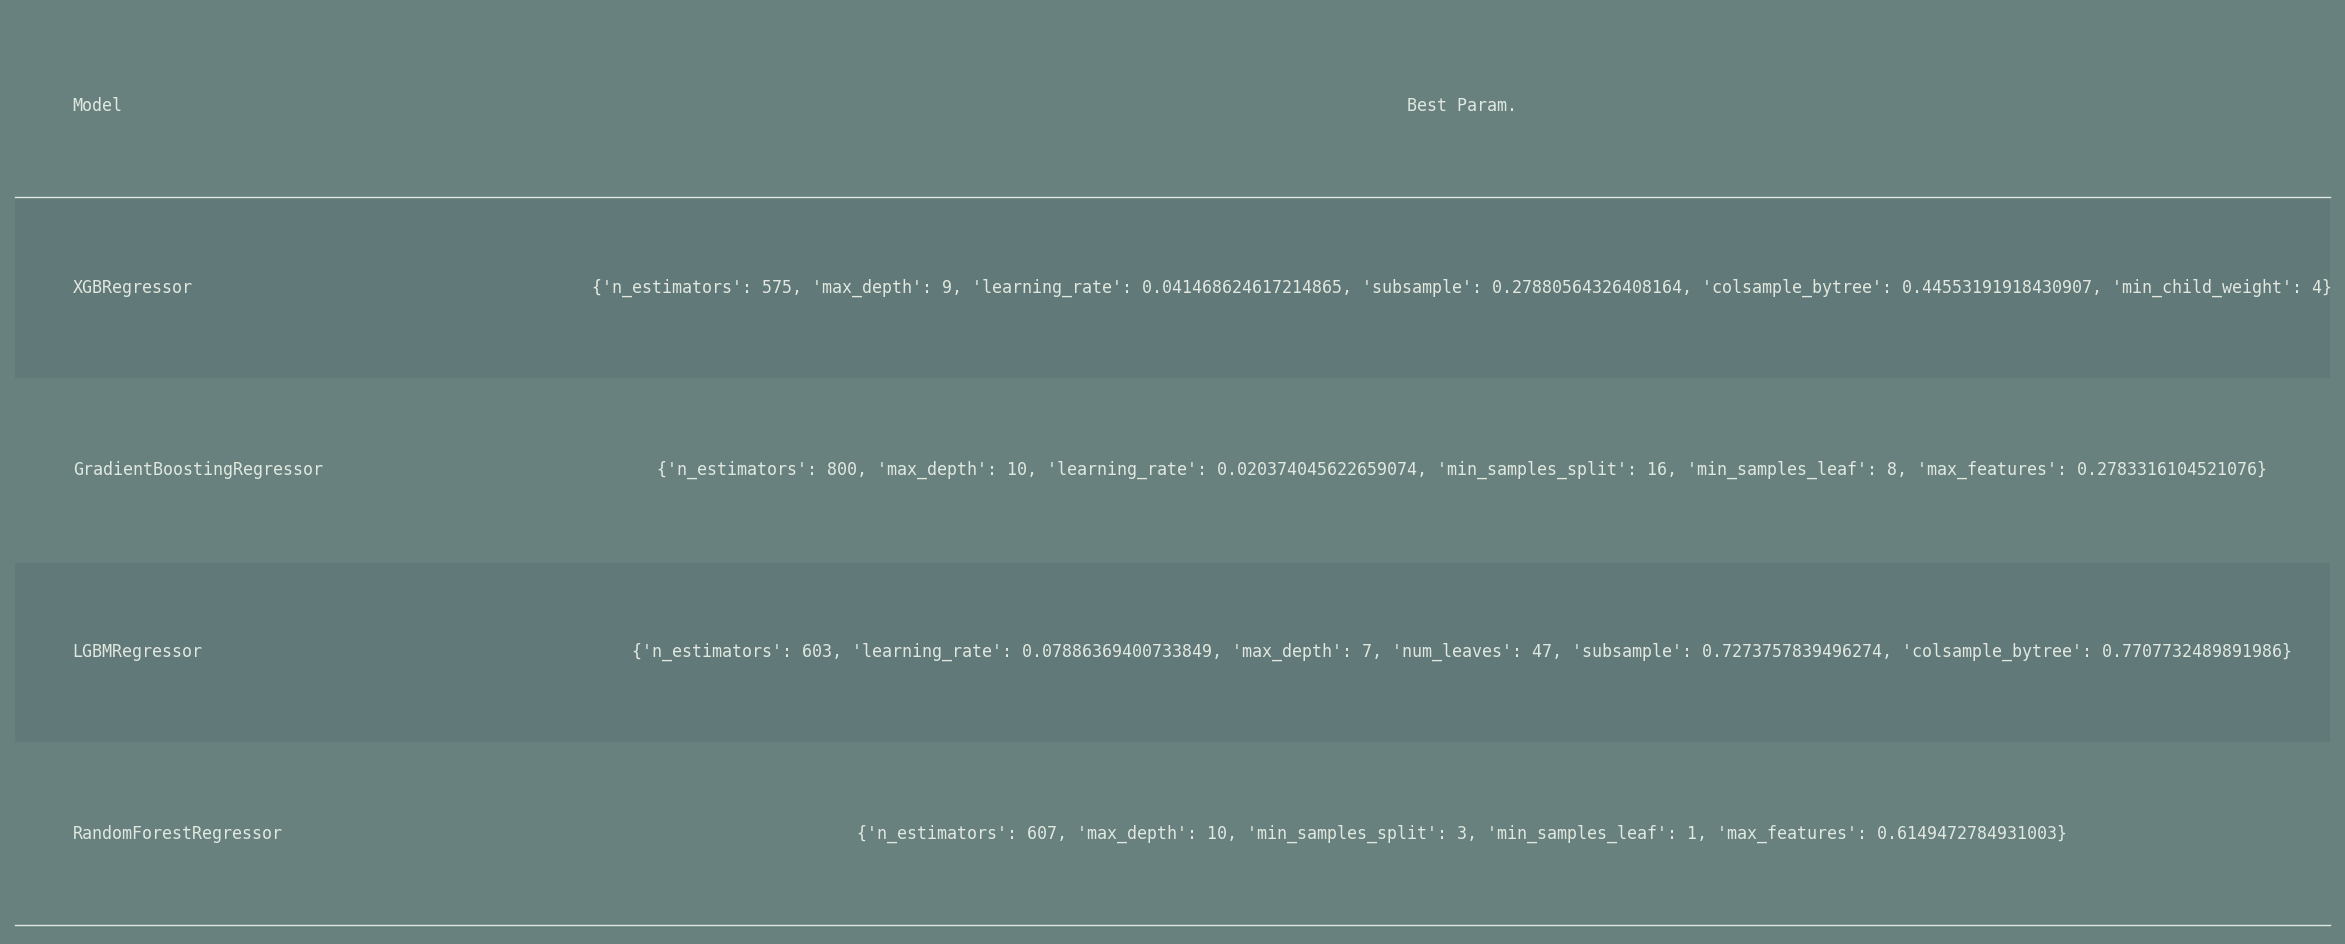

In [57]:
#results_list_table_2 = results_list_opt[['Model' , Best Param.']]

row_colors = {
    "even": "#627979",
    "odd": "#68817e",
}

bg_color = row_colors["odd"]
text_color = "#e0e8df"

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

table_col_defs = [
    ColDef("Model", width=3, title="Model", textprops={"ha": "left"}),
    ColDef("Best Param.", width=9, title="Best Param.", textprops={"ha": "center"}),  
]

fig, ax = plt.subplots(figsize=(30, 12))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color) 


table = Table(
    results_list_table_2,
    column_definitions=table_col_defs,
    index_col="Model",
    textprops={"fontsize": 12, "ha": "center"},
    row_dividers = True,
    footer_divider=True,
    row_divider_kw={"color": bg_color, "lw": 2},
    even_row_color=row_colors["even"],
    column_border_kw={"color": bg_color, "lw": 2},
    ax=ax
)
plt.show()

In [58]:
results_opt


,Model,RMSE (€),R²,MAE,MSE,Best Param.,Time
1,XGBRegressor,295.6029,0.8529,210.2837,87381.0542,"{'n_estimators': 575, 'max_depth': 9, 'learnin...",110.2239
2,GradientBoostingRegressor,299.2752,0.8492,204.1573,89565.6674,"{'n_estimators': 800, 'max_depth': 10, 'learni...",301.9270
3,LGBMRegressor,317.3258,0.8305,212.1035,100695.6861,"{'n_estimators': 603, 'learning_rate': 0.07886...",1060.2821
0,RandomForestRegressor,322.6419,0.8248,227.4427,104097.8159,"{'n_estimators': 607, 'max_depth': 10, 'min_sa...",617.8302


In [59]:
best_model = results_list_opt.iloc[0]
model_name = best_model['Model']
best_params = best_model['Best Param.']
model_class = globals()[model_name]
best_model_instance = model_class(**best_params)

In [60]:
best_model_instance

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.44553191918430907, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.041468624617214865, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=575, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
best_model_instance.fit(X_train_scaled, y_train)
y_pred = best_model_instance.predict(X_test_scaled)

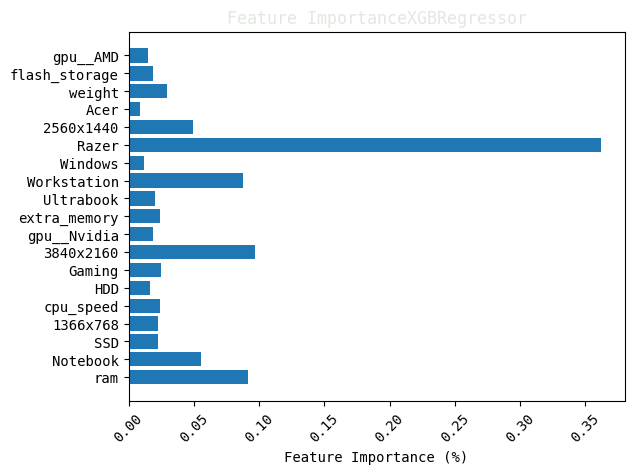

In [62]:
plot_feature_importance_2(X,best_model_instance,model_name)

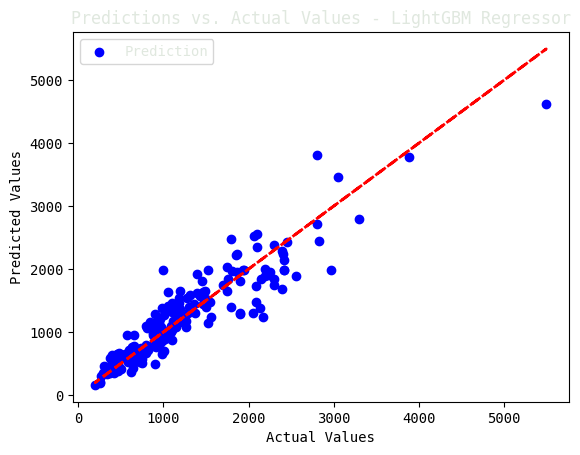

In [63]:
plt.scatter(y_test, y_pred, color='blue', label='Prediction')
plt.plot(y_test, y_test, linestyle='--', color='red', linewidth=2 )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Actual Values - LightGBM Regressor')
plt.legend()
plt.show()

<h3>
    <b>
        <p>
Carrying out a comprehensive analysis to predict laptop prices, three key factors affecting the results can be identified: the encoder used, the training sample, and parameter optimization with Optuna.
The choice of a suitable encoder can significantly impact the model's ability to learn patterns. In our case, we used the Pandas encoder, “dummies”, which seemed the most suitable for the situation, and discarded less influential categories in the data.</p><br>
<p>The quality of the training sample is essential, taking into account both representativeness and balance, determining crucially the possible training models and, consequently, the results. We chose to only remove seemingly less important variables and data far from the mean.</p><br>
<p>We found that the Optuna library is a powerful tool for hyperparameter optimization, conducting more efficient searches for the best parameters, saving time compared to manual search and Grid Search.</p><br><br>
<p>Conclusions:<br>
•	The optimal combination of encoder, training sample, and parameters may vary depending on the specific nature of the data and the problem.<br>
•	Continuous experimentation and cross-validation are essential to assess the model's performance in different configurations.<br>
•	Optuna provides a systematic and automated approach to hyperparameter search, proving beneficial in complex optimization tasks.</p><br>
<p>In summary, the key is to experiment and adjust these factors iteratively to find the combination that maximizes the accuracy of the most suitable model for predicting laptop prices. We invite you to "play" with these factors to obtain better and more accurate results.

<!--         </p>
    </b> -->
<h3>
